In [1]:
%%latex
\tableofcontents

<IPython.core.display.Latex object>

# Setup

## Import Libraries

In [2]:
print ('Install Packages')

import sys, copy, math, time, os

print ('Python version: {}'.format(sys.version))

#from collections import Counter

import numpy as np
print ('NumPy version: {}'.format(np.__version__))
np.set_printoptions(suppress=True)

import scipy as sc
print ('SciPy version:  {}'.format(sc.__version__))

import tensorflow as tf
print ('TensorFlow version:  {}'.format(tf.__version__))
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

from tensorflow import keras
print ('Keras version:  {}'.format(keras.__version__))

from keras import layers
import keras.backend as K
from keras.layers import IntegerLookup
from keras.layers import Normalization
from keras.layers import StringLookup
from keras.utils import get_custom_objects
from keras.utils import tf_utils

from keras.models import Sequential
from keras.layers import Dense

#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

import pandas as pd
print ('Pandas version:  {}'.format(pd.__version__))
pd.set_option('display.max_rows', 500)

import matplotlib
matplotlib.use("pgf")
matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

import matplotlib.pyplot as plt
%matplotlib inline

# Library for reading Microsoft Access files
#import pandas_access as mdb

import sklearn
print ('SciKit-Learn version: {}'.format(sklearn.__version__))
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

import imblearn
print ('Imbalanced-Learn version: {}'.format(imblearn.__version__))
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier

#!pip install pydot

# Set Randomness.  Copied from https://www.kaggle.com/code/abazdyrev/keras-nn-focal-loss-experiments
import random
#np.random.seed(42) # NumPy
#random.seed(42) # Python
#tf.random.set_seed(42) # Tensorflow

import warnings
warnings.filterwarnings('ignore')

print ('Finished Installing Packages')

Install Packages
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:26:08) [Clang 14.0.6 ]
NumPy version: 1.24.2
SciPy version:  1.7.3


/Users/bburkman/miniforge3/envs/Tensorflow_2_11/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version:  2.11.0
Keras version:  2.11.0
Pandas version:  1.5.3
SciKit-Learn version: 1.2.2
Imbalanced-Learn version: 0.10.1
Finished Installing Packages


## Get Data

In [3]:
def Get_Data():
    print ('Get_Data()')
    data = pd.read_csv(
        '../../Big_Files/CRSS_Imputed_All_05_19_23.csv',
        low_memory=False
    )
    print ('data.shape: ', data.shape)
    
    print ('End Get_Data()')
    print ()
    return data

def Test_Get_Data():
    data = Get_Data()
    display (data.head())
    
#Test_Get_Data()

# Remove_Pedestrian_Crashes

In [4]:
def Remove_Pedestrian_Crashes(data):
    print ('Remove_Pedestrian_Crashes()')
    display(data.PEDS.value_counts())
    n = len(data[data.PEDS>0])
    print ('Removing %d crashes that involve a pedestrian.' % n)
    data = data[data.PEDS==0]
    return data

def Test_Remove_Pedestrian_Crashes():
    data = Get_Data()
    print (len(data))
    data = Remove_Pedestrian_Crashes(data)
    print (len(data))

#Test_Remove_Pedestrian_Crashes()

## Engineer Features

In [5]:
def Feature_Engineering_Cross_Two(data):
    print ('Feature_Engineering_Cross_Two')
    Pairs = [
        ['AGE', 'SEX', 'AGE_x_SEX'],
        ['AGE', 'SCH_BUS', 'AGE_x_SCH_BUS']
    ]
    for P in Pairs:
        data[P[2]] = data[P[0]].map(str) + '_x_' + data[P[1]].map(str)
    
    print ()
    return data
        

## Thin Features

In [6]:
def Thin_Features(data):
    print ('Thin_Features()')

    Merge = [
        'CASENUM',
        'VEH_NO',
        'PER_NO',        
    ]

    Accident = [
        'DAY_WEEK',
        'HOUR',
        'INT_HWY',
        'LGT_COND',
        'MONTH',
#        'PEDS',
        'PERMVIT',
        'PERNOTMVIT',
        'PJ',
        'PSU',
        'PVH_INVL',
        'REGION',
        'REL_ROAD',
        'RELJCT1',
        'RELJCT2',
        'SCH_BUS',
        'TYP_INT',
        'URBANICITY',
        'VE_FORMS',
        'VE_TOTAL',
        'WEATHER',
        'WRK_ZONE',
        'YEAR',
    ]
    
    Vehicle = [
        'BODY_TYP',
        'BUS_USE',
        'EMER_USE',
        'MAKE',
#        'MOD_YEAR',
        'MODEL',
        'NUMOCCS',
        'VALIGN',
        'VNUM_LAN',
        'VPROFILE',
        'VSPD_LIM',
#        'VSURCOND',
        'VTRAFCON',
        'VTRAFWAY',
    ]
    
    Person = [
        'AGE',
        'LOCATION',
        'PER_TYP',
        'SEX',
        'HOSPITAL',    
    ]

    Engineered = [
        'VEH_AGE',
        'AGE_x_SEX',
        'AGE_x_SCH_BUS'
    ]
    
    # Put features in alphabetical order
    Features = Accident + Vehicle + Person + Engineered
    Features = sorted(Features)
#    Features = Merge + Features
    
    data = data.filter(Features, axis=1)
    
    print ('data.shape: ', data.shape)
    
    print ('End Thin_Features()')
    print ()
        
    return data

def Test_Thin_Features():
    data = Get_Data()
    data = Thin_Features(data)
    for feature in data:
        display(data[feature].value_counts())
        
#Test_Thin_Features()

## Really Thin Features

In [7]:
def Really_Thin_Features(data):
    print ('Really_Thin_Features()')

    Merge = [
        'CASENUM',
        'VEH_NO',
        'PER_NO',        
    ]

    Accident = [
        'DAY_WEEK',
        'HOUR',
        'INT_HWY',
#        'LGT_COND',
        'MONTH',
#        'PEDS',
#        'PERMVIT',
#        'PERNOTMVIT',
        'PJ',
        'PSU',
#        'PVH_INVL',
        'REGION',
        'REL_ROAD',
        'RELJCT1',
#        'RELJCT2',
#        'SCH_BUS',
        'TYP_INT',
        'URBANICITY',
#        'VE_FORMS',
#        'VE_TOTAL',
        'WEATHER',
#        'WRK_ZONE',
        'YEAR',
    ]
    
    Vehicle = [
#        'BODY_TYP',
#        'BUS_USE',
#        'EMER_USE',
#        'MAKE',
#        'MOD_YEAR',
#        'MODEL',
#        'NUMOCCS',
        'VALIGN',
        'VNUM_LAN',
        'VPROFILE',
        'VSPD_LIM',
#        'VSURCOND',
        'VTRAFCON',
        'VTRAFWAY',
    ]
    
    Person = [
        'AGE',
#        'LOCATION',
#        'PER_TYP',
        'SEX',
        'HOSPITAL',    
    ]

    Engineered = [
#        'VEH_AGE',
        'AGE_x_SEX',
#        'AGE_x_SCH_BUS'
    ]
    
    # Put features in alphabetical order
    Features = Accident + Vehicle + Person + Engineered
    Features = sorted(Features)
#    Features = Merge + Features
    
    data = data.filter(Features, axis=1)
    
    print ('data.shape: ', data.shape)
    
    print ('End Thin_Features()')
    print ()
        
    return data

def Test_Really_Thin_Features():
    data = Get_Data()
    data = Really_Thin_Features(data)
    for feature in data:
        display(data[feature].value_counts())
        
#Test_Really_Thin_Features()

In [8]:
def Thin_to_Minimal_Features(data):
    print ('Thin_to_Minimal_Features()')

    Accident = [
        'DAY_WEEK',
        'HOUR',
#        'INT_HWY',
#        'LGT_COND',
        'MONTH',
#        'PEDS',
#        'PERMVIT',
#        'PERNOTMVIT',
        'PJ',
        'PSU',
#        'PVH_INVL',
        'REGION',
#        'REL_ROAD',
#        'RELJCT1',
#        'RELJCT2',
#        'SCH_BUS',
#        'TYP_INT',
        'URBANICITY',
#        'VE_FORMS',
#        'VE_TOTAL',
        'WEATHER',
#        'WRK_ZONE',
        'YEAR',
    ]
    
    Vehicle = [
#        'BODY_TYP',
#        'BUS_USE',
#        'EMER_USE',
#        'MAKE',
#        'MOD_YEAR',
#        'MODEL',
#        'NUMOCCS',
#        'VALIGN',
#        'VNUM_LAN',
#        'VPROFILE',
#        'VSPD_LIM',
#        'VSURCOND',
#        'VTRAFCON',
#        'VTRAFWAY',
    ]
    
    Person = [
#        'AGE',
#        'LOCATION',
#        'PER_TYP',
#        'SEX',
        'HOSPITAL',    
    ]

    Engineered = [
#        'VEH_AGE',
#        'AGE_x_SEX',
#        'AGE_x_SCH_BUS'
    ]
    
    # Put features in alphabetical order
    Features = Accident + Vehicle + Person + Engineered
    Features = sorted(Features)
#    Features = Merge + Features
    
    data = data.filter(Features, axis=1)
    
    print ('data.shape: ', data.shape)
    
    print ('End Thin_Features()')
    print ()
        
    return data

def Test_Thin_to_Minimal_Features():
    data = Get_Data()
    data = Thin_to_Minimal_Features(data)
    for feature in data:
        display(data[feature].value_counts())
        
#Test_Thin_to_Minimal_Features()

## Get Dummies

In [9]:
def Get_Dummies(data, target):
    print ('Get_Dummies')
    data = data.astype('category')
    Target = data.pop(target)
    data_Dummies = pd.get_dummies(data, prefix = data.columns)
    data_Dummies = data_Dummies.join(Target)
#    for feature in data_Dummies:
#        print (feature)
    print ()

    return data_Dummies

def Test_Get_Dummies():
    print ('Test_Get_Dummies')
    A = pd.DataFrame({
        'A': ['a', 'b', 'a'], 
        'B': ['b', 'a', 'c'], 
        'C': [1, 2, 3]})
    C = Get_Dummies(A, 'C')
    display(C)
    print ()

#Test_Get_Dummies()

## Test-Train Split
- We're using sklearn's train_test_split rather than Pandas's sample because the former has a 'stratify' option that will put the same proportion of HOSPITAL==1 into each set.

In [10]:
def Split_Data(data, target, test_size):
    print ('Split_Data()')
    X = data.drop(columns=[target])
    y = data[target]
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, 
        #random_state=42
    )
    
    a = y_train[y_train==1].shape[0]
    b = y_test[y_test==1].shape[0]
    print (
        x_train.shape, 
        y_train.shape, a, round((a/(a+b)*100),2), '%')
    print (
        x_test.shape, 
        y_test.shape, b, round((b/(a+b)*100),2), '%'
    )
    print ()
    
    return x_train, x_test, y_train, y_test

# Imbalanced Data Resampling

## Tomek Links

In [11]:
def Tomek_Links(X_train, y_train):
    print ('Tomek_Links()')
    M = len(y_train)
    N = len(y_train)
    n = len(y_train[y_train==1])
    p = (N-n)/n
    print ('Before Tomek Links:')
    print ('%d samples, %d hospitalized, %d not hospitalized' % (N, n, N-n))
    print ('%f percent of samples hospitalized' % (n/N*100))
    print ('There are %f negative samples for each positive.' % ((N-n)/n))
    print ()

    X_train, y_train = TomekLinks().fit_resample(X_train, y_train)
    N = len(y_train)
    n = len(y_train[y_train==1])
    p = (N-n)/n
    print ('After Tomek Links:')
    print ('%d samples, %d hospitalized, %d not hospitalized' % (N, n, N-n))
    print ('%f percent of samples hospitalized' % (n/N*100))
    print ('There are %f negative samples for each positive.' % ((N-n)/n))
    print ('Removed %d samples, or %.2f%% of the set.' % (M-N, (M-N)/M*100))
    print ()
    
    return X_train, y_train

## Condensed Nearest Neighbor

In [12]:
def Condensed_Nearest_Neighbour(X_train, y_train):
    print ('Condensed_Nearest_Neighbour()')
    N = X_train.shape[0]
    print ('X_train.shape before = ', X_train.shape)
    print ('y_train.shape before = ', y_train.shape)
    print ()
    cnn = CondensedNearestNeighbour(n_neighbors=None)
    X_train, y_train = cnn.fit_resample(X_train, y_train)
    n = X_train.shape[0]
    print ('X_train.shape after = ', X_train.shape)
    print ('y_train.shape after = ', y_train.shape)
    print ()
    print ('Removed %d samples, or %.2f%% of the set.' % (N-n, (N-n)/N*100))
    print ()
    
    return X_train, y_train

# Undersample Data
- These functions take the three versions of the dataset, which correspond to these names in the paper:
    - Thin (Hard)
    - Really_Thin (Medium)
    - Thin_to_Minimum (Easy)
- runs Tomek Links on them once, then again, and saves the results to file.
- Each of the three sets takes about 90 minutes to run on my laptop.

In [13]:
%%time
def Undersample_Data_Thin(round_text):
    print ('Undersample_Data_Thin()')
    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Thin_Features(data)
    data = Get_Dummies(data, target)

    # Decrease set size, for debugging
#    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.80)
#    data = X_train
#    data[target] = y_train
    
    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.30)

    # CNN took 6 minutes at 99% decreased set size.  
#    X_train, y_train = Condensed_Nearest_Neighbour(X_train, y_train)

    # 413,913 samples before Tomek
    X_train.to_csv('../../Big_Files/X_train_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_before_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_before_Tomek' + round_text + '.csv', index=False)

    # Two rounds of Tomek took one hour 30 minutes
    X_train, y_train = Tomek_Links(X_train, y_train)
    # Write to csv and read back in, 
    #    so we can play with the stuff later without having to redo the Tomek Links, 
    #    which can take a long time.
    
    # 399,515 samples after Tomek, v1
    # 399,714  v2
    X_train.to_csv('../../Big_Files/X_train_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_after_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_after_Tomek' + round_text + '.csv', index=False)

    
    X_train, y_train = Tomek_Links(X_train, y_train)
    # 396,511 after Tomek twice v1
    # 396,718 v2
    X_train.to_csv('../../Big_Files/X_train_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    print ()
    
def Undersample_Data_Really_Thin(round_text):
    print ('Undersample_Data_Really_Thin()')

    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Really_Thin_Features(data)
    data = Get_Dummies(data, target)

    # Decrease set size, for debugging
#    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.80)
#    data = X_train
#    data[target] = y_train
    
    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.30)

    # CNN took 6 minutes at 99% decreased set size.  
#    X_train, y_train = Condensed_Nearest_Neighbour(X_train, y_train)

    # 413,913 Samples

    X_train.to_csv('../../Big_Files/X_train_Really_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Really_Thin_before_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Really_Thin_before_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Really_Thin_before_Tomek' + round_text + '.csv', index=False)

    # Two rounds of Tomek took one hour 30 minutes
    X_train, y_train = Tomek_Links(X_train, y_train)
    # Write to csv and read back in, 
    #    so we can play with the stuff later without having to redo the Tomek Links, 
    #    which can take a long time.
    
    # 406,691 Samples v1
    # 406,781 v2
    X_train.to_csv('../../Big_Files/X_train_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Really_Thin_after_Tomek' + round_text + '.csv', index=False)
    
    # 405,288 Samples v1
    # 405,368 v2

    X_train, y_train = Tomek_Links(X_train, y_train)
    X_train.to_csv('../../Big_Files/X_train_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Really_Thin_after_Tomek_Twice' + round_text + '.csv', index=False)
    print ()
    
def Undersample_Data_Thin_to_Minimal(round_text):
    print ('Undersample_Data_Thin_to_Minimal()')

    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Thin_to_Minimal_Features(data)
    data = Get_Dummies(data, target)

    # Decrease set size, for debugging
#    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.80)
#    data = X_train
#    data[target] = y_train
    
    X_train, X_test, y_train, y_test = Split_Data(data, target, 0.30)

    # CNN took 6 minutes at 99% decreased set size.  
#    X_train, y_train = Condensed_Nearest_Neighbour(X_train, y_train)
    X_train.to_csv('../../Big_Files/X_train_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_to_Minimal_before_Tomek' + round_text + '.csv', index=False)


    # Two rounds of Tomek took one hour 30 minutes
    X_train, y_train = Tomek_Links(X_train, y_train)
    # Write to csv and read back in, 
    #    so we can play with the stuff later without having to redo the Tomek Links, 
    #    which can take a long time.
    X_train.to_csv('../../Big_Files/X_train_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_to_Minimal_after_Tomek' + round_text + '.csv', index=False)


    X_train, y_train = Tomek_Links(X_train, y_train)
    X_train.to_csv('../../Big_Files/X_train_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_train.to_csv('../../Big_Files/y_train_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    X_test.to_csv('../../Big_Files/X_test_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    y_test.to_csv('../../Big_Files/y_test_Thin_to_Minimal_after_Tomek_Twice' + round_text + '.csv', index=False)
    print ()
    
#Undersample_Data_Thin('_v1')
#Undersample_Data_Really_Thin('_v1')
#Undersample_Data_Thin_to_Minimal('_v1')

#Undersample_Data_Thin('_v2')
#Undersample_Data_Really_Thin('_v2')
#Undersample_Data_Thin_to_Minimal('_v2')



CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


## Undersampling Results
- Start with 747,342 samples
- Remove 33,776 samples iwth pedestrians to get 713,566 samples
- Split 70/30 to have 499,496 samples in training set, 214,070 in test set
- In training set, 499,496 samples, 78,926 hospitalized, 420,570 not hospitalized


| Feature Set | Random Seed | Tomek Round | # Samples Removed | % Samples Removed |
| --- | --- | --- | --- | --- |
| Hard | 1 | 1 | 17,851 | 3.57 |
| Hard | 2 | 1 | 7,794 | 3.56 |
| Hard | 1 | 2 | 3,664 | 0.76 |
| Hard | 2 | 2 | 3,751 | 0.78 |
| Medium | 1 | 1 | 8,839 | 1.77 |
| Medium | 2 | 1 | 8.825 | 1.77 |
| Medium | 1 | 2 | 1,736 | 0.35 |
| Medium | 2 | 2 | 1,656 | 0.34 |
| Easy | 1 | 1 | 6 | 0.00 |
| Easy | 2 | 1 | 3 | 0.00 |
| Easy | 1 | 2 | 0 | 0.00 |
| Easy | 2 | 2 | 0 | 0.00 |


 

# Loss Functions

## Alpha Weighted Binary Crossentropy

In [14]:
def alpha_weighted_binary_crossentropy_with_parameter(alpha = 0.5):
    def alpha_weighted_binary_crossentropy(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=y_pred.dtype)

        binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred)
        weights = tf.where(tf.equal(y_true,1),alpha, 1-alpha)
        product = tf.multiply(binary_crossentropy, weights)
        loss = keras.backend.mean(product)
        return loss
    return alpha_weighted_binary_crossentropy


In [15]:
def alpha_weighted_binary_crossentropy_with_class_weight_parameters(weight_0 = 1.0, weight_1 = 1.0):
    # Weights for each class = (nSamples Total)/(2* (nSamples in Class))
    def alpha_weighted_binary_crossentropy(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=y_pred.dtype)
        binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred, from_logits=False)
        weights = tf.where(tf.equal(y_true,1),weight_1, weight_0)
        product = tf.multiply(binary_crossentropy, weights)
        loss = keras.backend.mean(product)
        return loss
    return alpha_weighted_binary_crossentropy


## Focal Loss

In [16]:
def focal_loss(y_true, y_pred):
    # The dataset has  259077  elements.
    # The target group has  31891  elements.
    # Our target is  12.3095 % of the dataset.
    # There are  8.12  negative elements for each positive.    
#    p = 8.12
    p = 5.94

    alpha = (p/(p+1))*1.0

    gamma_1 = 0.0 # Must be float for the tf.math.pow() function to work.
    gamma_2 = 0.0
    y_true = tf.cast(y_true, dtype=y_pred.dtype)
    binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred)
#    print (binary_crossentropy.numpy())
    weights = tf.where(tf.equal(y_true,1),alpha, 1-alpha)
#    print (weights.numpy())
    focal = tf.where(tf.equal(y_true,1), (1.0-y_pred), (y_pred))
    power = tf.where(tf.equal(y_true,1), gamma_1, gamma_2)
    focal_power = tf.math.pow(focal,power)
#    print (focal.numpy())
#    print (power.numpy())
#    print (focal_power.numpy())
    product = tf.multiply(binary_crossentropy, weights)
    focal_power_product = tf.multiply(product, focal_power)
#    print (focal_power_product.numpy())
    loss = keras.backend.mean(focal_power_product)
#    print (loss.numpy())
    return loss

## Focal Loss with Parameters
- Adapted from https://www.kaggle.com/code/abazdyrev/keras-nn-focal-loss-experiments

In [17]:
def focal_loss_with_parameters(alpha = 0.5, gamma_0=0.0, gamma_1=0.0):
    def focal_loss(y_true, y_pred):
        y_true = tf.cast(y_true, dtype=y_pred.dtype)
#        tf.clip_by_value(y_pred, 0.00001, 0.99999) # Make sure we don't blow up the logarithm
        binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred)
        weights = tf.where(tf.equal(y_true,1),alpha, 1.0-alpha)
        focal = tf.where(tf.equal(y_true,1), (1.0-y_pred), (y_pred))
        power = tf.where(tf.equal(y_true,0), gamma_0, gamma_1)
        focal_power = tf.math.pow(focal,power)
        product = tf.multiply(binary_crossentropy, weights)
        focal_power_product = tf.multiply(product, focal_power)
#        tf.clip_by_value(focal_power_product, 0.00001, 0.99999)
        loss = keras.backend.mean(focal_power_product)
        if math.isnan(loss):
            print ('loss is nan')
        return loss
    
    return focal_loss

get_custom_objects().update({'focal_loss_with_parameters': focal_loss_with_parameters()})

In [18]:
def focal_loss_with_parameters_2(alpha=.25, gamma=2.0):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(K.epsilon()+pt_1))-K.mean((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0 + K.epsilon()))
    return focal_loss_fixed


## Test Loss Functions

In [19]:
def Test_Loss_Functions():
    
    ### Data as list y_test and y_prob
    y_test = [0.0]*500 + [1.0]*500
    y_test_binary = [0]*500 + [1]*500
#    y_test = [0.0, 1.0]*5
#    y_test_binary = [0,1]*5
#    y_prob = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 0.99, 0.999]
    y_prob = [random.random() for x in range (1000)]
#    print (y_prob)
    
    ### Data as tensors y_true and y_pred
    y_true = np.array(y_test, dtype=np.float32)
    y_true = tf.convert_to_tensor(y_true)
    y_pred = np.array(y_prob, dtype=np.float32)
    y_pred = tf.convert_to_tensor(y_pred)

    ####################################################
    print ('Test with p==1.0, alpha = 0.5, gamma = 0.0')

    ### Calculate binary crossentropy by hand
    BCE = [-(y_test[i] * math.log(y_prob[i]) + (1 - y_test[i]) * math.log(1 - y_prob[i])) for i in range (10)]
    Class_Weights = [1.0,1.0]
    Weights = [Class_Weights[y_test_binary[i]] for i in range(10)]
    Product = [BCE[i] * Weights[i] for i in range (10)]
    loss = sum(Product)/len(Product)
    print (loss, "  Hand-calculated BCE loss")
    
    ### Calculate binary crossentropy like I did in my custom loss functions
    binary_crossentropy = keras.backend.binary_crossentropy(y_true, y_pred, from_logits=False)
#    display(binary_crossentropy.numpy())
    loss = keras.backend.mean(binary_crossentropy).numpy()
    print (loss, "  My custom AWBCE function's no-alpha backend")
    
    ### Calculate binary crossentropy using my custom loss function
    loss_function = alpha_weighted_binary_crossentropy_with_parameter(alpha = 0.5)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom one-parameter AWBCE function')
    
    ### Calculate binary crossentropy using my custom loss function
    # Weights for each class = (nSamples Total)/(2* (nSamples in Class))
    loss_function = alpha_weighted_binary_crossentropy_with_class_weight_parameters(weight_0 = 1.0, weight_1 = 1.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom two-parameter AWBCE function')
    
    ### Calculate binary crossentropy using Keras's loss function
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    loss = bce(y_true, y_pred).numpy()
    print (loss, "  Keras's BCE function")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.5,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.5, 0.0, 0.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=0.0')
    
    ####################################################
    print ()
    print ('Test with p = 3.0, alpha = 0.75, gamma = 0.0')
    
    ### Calculate binary crossentropy using my custom loss function
    loss_function = alpha_weighted_binary_crossentropy_with_parameter(alpha = 0.75)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom one-parameter AWBCE function')
    
    ### Calculate binary crossentropy using my custom loss function
    # Weights for each class = (nSamples Total)/(2* (nSamples in Class))
    loss_function = alpha_weighted_binary_crossentropy_with_class_weight_parameters(weight_0 = 2.0/3.0, weight_1 = 2.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My custom two-parameter AWBCE function')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.75,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.75, 0.0, 0.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=0.0')
    
    ####################################################
    print ()
    print ('Test with alpha = 0.8, gamma = 0.0')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.8,
        gamma = 0.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.8, 0.0, 0.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function')

    ####################################################
    print ()
    print ('Test with alpha = 0.8, gamma = 2.0')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.8,
        gamma = 2.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.8, 2.0, 2.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=2.0')

    ####################################################
    print ()
    print ('Test with p = 1.0, alpha = 0.5, gamma = 2.0')
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.5,
        gamma = 2.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate focal loss using my custom loss function
    loss_function = focal_loss_with_parameters(0.5, 2.0, 2.0)
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, '  My BFC function with gamma=2.0')

    ##################################################################
    print ()
    print ("Test Keras's BFC Function with different values of alpha")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.1,
        gamma = 0.0, 
#        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.5,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    
    ### Calculate the same value using the BinaryFocalCrossentropy function
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing = True, 
        alpha = 0.9,
        gamma = 0.0, 
        from_logits=False
    )
    loss = loss_function(y_true, y_pred).numpy()
    print (loss, "  Keras's BFC function")
    

    
    
    
#Test_Loss_Functions()

# Models

## Another Keras Binary Classification Model
https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

In [20]:
def Keras_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha, gamma, epochs, filename, title):
    print ('Keras_Binary_Focal_Crossentropy')
    print ('alpha = ', alpha, ', gamma = ', gamma)
    print ()
    loss_function = tf.keras.losses.BinaryFocalCrossentropy(
        apply_class_balancing=True,
        alpha=alpha,
        gamma=gamma,
#        from_logits=False,
#        label_smoothing=0.0,
#        axis=-1,
#        reduction=losses_utils.ReductionV2.AUTO,
#        name='binary_focal_crossentropy'
    )   
    
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(X_train.shape[-1],), activation='relu'))
#    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    
    # Compile model
    metrics = [
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
#        F1_Metric,
    ]
    model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(), metrics=metrics)
    estimator = KerasClassifier(
        model=model, 
#        random_state=42,
        metrics=metrics,
        batch_size=128, 
        verbose=0,
        epochs=epochs,
    )
    
    # Fit model
    estimator.fit(
        X_train, 
        y_train.values.ravel(),
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)},
    )
    
    # Test on training set for overfit
    y_proba = estimator.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on Test Set
    y_proba = estimator.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return 0    

## Our Binary Focal Crossentropy Classification Model

In [21]:
def Our_Binary_Focal_Crossentropy(X_train, X_test, y_train, y_test, alpha, gamma_0, gamma_1, epochs, filename, title):
    print ('Our_Binary_Focal_Crossentropy')
    print ('alpha = ', alpha, ' gamma_0 = ', gamma_0, ', gamma_1 = ', gamma_1)

#    alpha_target = r_target/(r_target+1)
    loss_function = focal_loss_with_parameters(alpha, gamma_0, gamma_1)
#    loss_function = focal_loss_with_parameters_2(alpha_target, gamma)
    
    # create model
    model = Sequential()
    model.add(Dense(60, input_shape=(X_train.shape[-1],), activation='relu'))
#    model.add(Dense(30, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    
    # Compile model
    model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
    metrics = [
        keras.metrics.Precision(name="precision"),
        keras.metrics.Recall(name="recall"),
#        F1_Metric,
    ]
    estimator = KerasClassifier(
        model=model, 
#        random_state=42,
        metrics=metrics,
        batch_size=128, 
        verbose=0,
        epochs=epochs,
    )
    
    # Fit model
    estimator.fit(
        X_train, 
        y_train.values.ravel(),
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)},
    )

    # Test on training set for overfit
    y_proba = estimator.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    
    # Test on Test Set
    y_proba = estimator.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return 0    

## AdaBoost Model
https://stackoverflow.com/questions/39063676/how-to-boost-a-keras-based-neural-network-using-adaboost
- model.predict_proba(X_test) returns two columns, 
    - the first the probability that the sample is in class 0, 
    - and the second the probability that the sample is in class 1.
    - We just want the second column.

In [22]:
def AdaBoost(X_train, X_test, y_train, y_test, filename, title):
    print ('AdaBoost() ', filename)
    model = AdaBoostClassifier(n_estimators=100)
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on Test Set
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return model    

### Ensembles of Classifiers
https://imbalanced-learn.org/stable/ensemble.html#bagging-classifier

with arguments based on the documentation examples

https://imbalanced-learn.org/stable/auto_examples/ensemble/plot_comparison_ensemble_classifier.html#sphx-glr-auto-examples-ensemble-plot-comparison-ensemble-classifier-py

## Bagging Classifier

In [23]:
def Bagging(X_train, X_test, y_train, y_test, filename, title):
    print ('Bagging() ', filename)
    model = BalancedBaggingClassifier(
#        random_state=42
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on Test Set
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)

    print ()
    return model

## Balanced Random Forest Classifier

In [24]:
def Balanced_Random_Forest_Classifier(X_train, X_test, y_train, y_test, alpha, filename, title):
    print ('Balanced Random Forest Classifier ', filename)
    print ('alpha = ', alpha)
    print ()
    model = BalancedRandomForestClassifier(
        bootstrap = True, ccp_alpha = 0.0, criterion = 'gini', 
        max_depth = None,
#        max_depth = 40, 
        max_features = 'sqrt', 
        max_leaf_nodes = None,
#        max_leaf_nodes = 10000,  
        max_samples = None, 
        min_impurity_decrease = 0.0, 
        min_samples_leaf = 1, 
        min_samples_split = 2, 
        min_weight_fraction_leaf = 0.0, 
        n_estimators = 100, 
#        n_estimators = 1000, 
        n_jobs = None, 
        oob_score = False, 
        random_state = None, 
        replacement = False, 
        sampling_strategy = 'auto', 
        verbose = 0, 
        warm_start = False,
        class_weight = {0:1-alpha, 1:alpha}
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    print ()
    print ('model.get_params()')
    print (model.get_params())
    print ()
    
    print ('[estimator.get_depth() for estimator in model.estimators_]')
    print ([estimator.get_depth() for estimator in model.estimators_])
    print ()
    print ('[estimator.get_n_leaves() for estimator in model.estimators_]')
    print ([estimator.get_n_leaves() for estimator in model.estimators_])
    print ()
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    
    
    print ()
    return model    


## RUSBoost Classifier

In [25]:
def RUSBoost_Classifier(X_train, X_test, y_train, y_test, estimator, filename, title):
    print ('RUSBoost Classifier ', filename)
    model = RUSBoostClassifier(
        n_estimators=1000, 
        estimator=estimator,
        algorithm='SAMME.R', 
#        random_state=42
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )
    
    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on test data, to test for underfit
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)

    print ()
    return model    


## Easy Ensemble Classifier (Adaboost)

In [26]:
def Easy_Ensemble_Classifier(X_train, X_test, y_train, y_test, filename, title):
    print ('Easy Ensemble Classifier ', filename)
    estimator = AdaBoostClassifier(n_estimators=10)
    model = EasyEnsembleClassifier(n_estimators=10, estimator=estimator)
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )

    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on test data, to test for underfit
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return model    

## Logistic Regression

In [27]:
def Logistic_Regression_Classifier(X_train, X_test, y_train, y_test, alpha, filename, title):
    print ('Logistic Regression Classifier ', filename)
    model = LogisticRegression(
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)}
        class_weight = {0:1-alpha, 1:alpha},
        max_iter=1000,
#        random_state=42,
    )
    model.fit(
        X_train, 
        y_train.values.ravel(),
    )

    # Test on training set for overfit
    y_proba = model.predict_proba(X_train)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_train, y_proba, y_pred, filename + '_Train', title)  
    
    # Test on test data, to test for underfit
    y_proba = model.predict_proba(X_test)
    y_proba = [x[1] for x in y_proba]
    y_pred = K.round(y_proba).numpy()
    y_proba = np.array(y_proba)
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    print ()
    return model    

# Evaluate Models

In [28]:
def Chart_and_Plots(y_test, y_proba, y_pred, filename, title):
    
    Analyze_Prediction(y_test, y_proba, filename, title)
    Plot_Prediction(y_test, y_proba, filename, title)
    Plot_Prediction_Wide(y_test, y_proba, filename, title)
    ROC(y_test, y_proba, [], filename)
    
    y_test, y_proba_New, y_pred = Linear_Transform_y_proba_Specified(y_test, y_proba, 0.0, 1.0)
    Filename = filename + '_Transformed_100'
    Analyze_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction_Wide(y_test, y_proba_New, Filename, title)
    ROC(y_test, y_proba_New, [], Filename)

    y_test, y_proba_New, y_pred = Linear_Transform_y_proba_Specified(y_test, y_proba, 0.01,0.99)
    Filename = filename + '_Transformed_98'
    Analyze_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction_Wide(y_test, y_proba_New, Filename, title)
    ROC(y_test, y_proba_New, [], Filename)

    y_test, y_proba_New, y_pred = Linear_Transform_y_proba_Specified(y_test, y_proba, 0.025,0.975)
    Filename = filename + '_Transformed_95'
    Analyze_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction(y_test, y_proba_New, Filename, title)
    Plot_Prediction_Wide(y_test, y_proba_New, Filename, title)
    ROC(y_test, y_proba_New, [], Filename)

    
    print ()
    

In [29]:
def Linear_Transform_y_proba(y_test, y_proba):
    print ('Linear_Transform_y_proba()')
    print ()
    
    # I considered two methods.  
    # One was to take the medians of the negative and positive classes and transform them to 0.25 and 0.75.
    # That didn't always work the way I wanted.  
    # Then I tried taking the 0.05 quantile to 0.05 and the 0.95 quantile to 0.95.
    
#    N_median = np.median(y_proba[np.array(y_test)==0])
#    P_median = np.median(y_proba[np.array(y_test)==1])
#    center = (N_median + P_median)/2
#    print ('N_median = %.3f, P_median = %.3f, center = %.3f' % (N_median, P_median, center))
#    y_proba = 0.25/(center - N_median) * (y_proba - center) + 0.5

    
    a = np.quantile(y_proba[np.array(y_test)==0],0.025)
    b = np.quantile(y_proba[np.array(y_test)==1],0.975)
    print ('a = %.3f, b = %.3f' % (a, b))
    y_proba = 1/(b-a) * (y_proba - a)
    
    y_proba = np.where (y_proba < 0.0, 0.0, y_proba)
    y_proba = np.where (y_proba > 1.0, 1.0, y_proba)
    y_pred = K.round(y_proba)

    print ()
    
    return y_test, y_proba, y_pred

In [30]:
def Linear_Transform_y_proba_Specified(y_test, y_proba, left, right):
    print ('Linear_Transform_y_proba()')
    print ()
    
    # I considered two methods.  
    # One was to take the medians of the negative and positive classes and transform them to 0.25 and 0.75.
    # That didn't always work the way I wanted.  
    # Then I tried taking the 0.05 quantile to 0.05 and the 0.95 quantile to 0.95.
    
#    N_median = np.median(y_proba[np.array(y_test)==0])
#    P_median = np.median(y_proba[np.array(y_test)==1])
#    center = (N_median + P_median)/2
#    print ('N_median = %.3f, P_median = %.3f, center = %.3f' % (N_median, P_median, center))
#    y_proba = 0.25/(center - N_median) * (y_proba - center) + 0.5

    
    a = np.quantile(y_proba[np.array(y_test)==0],left)
    b = np.quantile(y_proba[np.array(y_test)==1],right)
    print ('a = %.3f, b = %.3f' % (a, b))
    y_proba = 1/(b-a) * (y_proba - a)
    
    y_proba = np.where (y_proba < 0.0, 0.0, y_proba)
    y_proba = np.where (y_proba > 1.0, 1.0, y_proba)
    y_pred = K.round(y_proba)

    print ()
    
    return y_test, y_proba, y_pred

## Evaluate_Model

In [31]:
def Evaluate_Model(y_test, y_proba, y_pred, center, filename):
    print ('Evaluate_Model()')
    y_test = np.array(y_test)
    y_pred = [round(x) for x in y_proba]
    y_pred = np.array(y_pred)
#    print ('np.unique(y_proba) = ', np.unique(y_proba))
#    print ('np.unique(y_pred) = ', np.unique(y_pred))
    CM = confusion_matrix(y_test, y_pred)
#    print(CM)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_value = auc(fpr, tpr)
    
    CSV = [[filename, CM[0][0], CM[0][1], CM[1][0], CM[1][1], center, auc_value]]
    np.savetxt('./Confusion_Matrices/' + filename + '.csv', 
        CSV,
        delimiter =", ", 
        fmt ='% s'
              )
#    print ()
    CM = confusion_matrix(y_test, y_pred, normalize='all')
#    print(CM)
#    print ()

#    y_pred = y_pred.ravel()
#    y_test = tf.convert_to_tensor(y_test)
#    y_pred = tf.convert_to_tensor(y_pred)

#    print ('%.3f & Precision \cr ' %  Precision_Metric(y_test, y_pred).numpy())
#    print ('%.3f & Recall \cr ' %  Recall_Metric(y_test, y_pred).numpy())
#    print ('%.3f & F1 \cr ' %  F1_Metric(y_test, y_pred).numpy())



## Plot Prediction

How to insert a .pgf plot into a \LaTeX document:

\begin{figure}
    \begin{center}
        \input{Plot.pgf}
    \end{center}
    \caption{A PGF histogram from \texttt{matplotlib}.}
\end{figure}


In [32]:
def Plot_Prediction(y_test, y_proba, filename, title):
    print ('Plot_Prediction()')
    print (filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 10
    bins= [x/n for x in range (0, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)
    
    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)
    plt.xticks(
        ticks = [0, 2.5, 5, 7.5, 10], 
        labels = ['0.0', '0.25', '0.5', '0.75', '1.0'],
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Data Set')
    plt.savefig('./Images/' + filename + '_Pred.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_Pred.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_Pred.png')
    plt.show()
    plt.close()
    print ()


In [33]:
def Plot_Prediction_Zoom(y_test, y_proba, filename, title, left, right):
    print ('Plot_Prediction()')
    print (filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    B = B[A['HOSPITAL'] > left]
    B = B[A['HOSPITAL'] < right]
    A = A[A['HOSPITAL'] > left]
    A = A[A['HOSPITAL'] < right]
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    bins = [x*0.05 for x in range (21)]
#    bins = [x*0.10 for x in range (11)]
    n = 10
    bins= [left + (right-left)*x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=False)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=False)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100

    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)

    ticks = [0, 2.5, 5, 7.5, 10]
    labels = [str(round(left + (right-left) * t/10,2)) for t in ticks]
    plt.xticks(
        ticks = ticks, 
        labels = labels,
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Data Set')
    plt.savefig('./Images/' + filename + '_Pred_Zoom.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_Pred_Zoom.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_Pred_Zoom.png')
    plt.show()
    plt.close()
    print ()


Plot_Prediction()
Test
./Images/Test_Pred_Wide.png


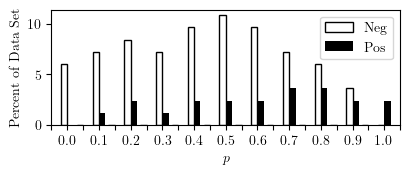

In [34]:
def Plot_Prediction_Wide(y_test, y_proba, filename, title):
    print ('Plot_Prediction()')
    print (filename)
    
#    print ('y_test = ', y_test)
#    print ('y_proba = ',y_proba)

#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    print ("A = pd.DataFrame(y_proba, columns=['HOSPITAL'])")
#    display(A)
#    print ("B = pd.DataFrame(y_test, columns=['HOSPITAL'])")
#    display(B)
#    print ("C = A[B['HOSPITAL']==0]")
#    display(C)
#    print ("D = A[B['HOSPITAL']==1]")
#    display(D)
    n = 20
#    bins= [x/n - 1/(2*n) for x in range (-1, n+3)]
    bins= [x/n for x in range (-1, n+1)]
#    print ('Bins = ', bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
#    print ("E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(E)
#    print ("F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)")
#    display(F)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)
#    print ("G = E.value_counts(sort=False)")
#    display(G)
#    print ("H = F.value_counts(sort=False)")
#    display(H)

    G = G/len(y_proba)*100
    H = H/len(y_proba)*100
#    print ("G = G/len(y_proba)*100")
#    display(G)
#    print ("H = H/len(y_proba)*100")
#    display(H)

    fig = plt.figure(figsize=(4.5,1.5)) # Create matplotlib figure
    ax = fig.add_subplot(111) # Create matplotlib axes
    
    G.plot(kind='bar', fill=False, ax=ax, width=0.4, position=1)
    H.plot(kind='bar', color='black', ax=ax, width=0.4, position=0)
    ticks = [n/20*i for i in range (-1,22)]
#    print ('ticks = ', ticks)
    plt.xticks(
        ticks = ticks,
        labels = ['','0.0', '', '0.1', '', '0.2', '', '0.3', '', '0.4', '', '0.5', '', '0.6', '', '0.7', '', '0.8', '', '0.9', '', '1.0', ''],
        rotation=0
    )
    ax.legend(['Neg', 'Pos'])
#    plt.title(title)
    plt.xlabel('$p$')
    plt.ylabel('Percent of Data Set')
    plt.savefig('./Images/' + filename + '_Pred_Wide.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_Pred_Wide.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_Pred_Wide.png')
    plt.show()
    plt.close()
    print ()

def Test_Plot_Prediction_Wide():
    
    y_proba = (
        [0.0]*5 + 
        [0.0]*0 + 
        [0.1]*6 + 
        [0.1]*1 + 
        [0.2]*7 + 
        [0.2]*2 + 
        [0.3]*6 + 
        [0.3]*1 + 
        [0.4]*8 + 
        [0.4]*2 + 
        [0.5]*9 + 
        [0.5]*2 + 
        [0.6]*8 + 
        [0.6]*2 + 
        [0.7]*6 + 
        [0.7]*3 + 
        [0.8]*5 + 
        [0.8]*3 + 
        [0.9]*3 + 
        [0.9]*2 + 
        [1.0]*0 + 
        [1.0]*2 
    )
    y_test = (
        [0]*5 + 
        [1]*0 + 
        [0]*6 + 
        [1]*1 + 
        [0]*7 + 
        [1]*2 + 
        [0]*6 + 
        [1]*1 + 
        [0]*8 + 
        [1]*2 + 
        [0]*9 + 
        [1]*2 + 
        [0]*8 + 
        [1]*2 + 
        [0]*6 + 
        [1]*3 + 
        [0]*5 + 
        [1]*3 + 
        [0]*3 + 
        [1]*2 + 
        [0]*0 + 
        [1]*2 
    )
    Plot_Prediction_Wide(y_test, y_proba, 'Test', 'Test')
    
Test_Plot_Prediction_Wide()

## Switching between FP/TP and Precision

$$\text{Precision} = \frac{TP}{FP+TP}$$

$$\frac{1}{\text{Precision}} = \frac{FP+TP}{TP} = \frac{FP}{TP} + \frac{TP}{TP} = \frac{FP}{TP} +  1$$

$$\frac{FP}{TP} + 1 = \frac{1}{\text{Precision}}$$

$$\frac{FP}{TP} = \frac{1}{\text{Precision}} - 1 = \frac{1}{\text{Precision}} - \frac{\text{Precision}}{\text{Precision}}  = \frac{1 - \text{Precision}}{\text{Precision}}$$

- In a previous version I had wanted $FP/TP$ to equal either 2.0, 1.0, or 0.5, indicating that we were willing to send 2 unnecessary ambulances for each necessary one, etc.  
    - $FP/TP = 2.0$ corresponds to precision = 1/3
    - $FP/TP = 1.0$ corresponds to precision = 1/2
    - $FP/TP = 0.5$ corresponds to precision = 2/3

- Neg/Pos corresponds to marginal precision similarly

In [35]:
def Value_Counts_y_proba(y_proba, filename):
#    print ()
    print ('Value_Counts_y_proba')
#    print (type(y_proba))
    Y_proba = pd.Series(y_proba)
    A = Y_proba.value_counts().reset_index(drop=True)
    n = len(y_proba)
    nA = len(A)
#    display(Y_proba)
#    display(A)
    B = A.cumsum()
#    display(B)
#    print (B[10])
#    print ()
    cutoff_95 = B.sub(0.95*n).abs().idxmin() + 1
    cutoff_90 = B.sub(0.90*n).abs().idxmin() + 1
    cutoff_80 = B.sub(0.80*n).abs().idxmin() + 1
    print (n, nA)
    print (cutoff_95)
#    print ()

    n100 = min(100, len(B)-1)
    n200 = min(200, len(B)-1)
#    print ('n200 = ', n200)
    f = open('./Analyze_Proba/Value_Counts_y_proba.csv', 'a')
    f.write('%s,%d,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f,%d,%0.4f\n' % (
        filename, n, nA, nA/n, 
        cutoff_95, cutoff_95/n,
        cutoff_90, cutoff_90/n,
        cutoff_80, cutoff_80/n,
        B[10], B[10]/n,
        B[20], B[20]/n,
        B[n100], B[n100]/n,
        B[n200], B[n200]/n,
    ))
    f.close()
    
    H = Y_proba.value_counts().head(100)
    Filename = './Analyze_Proba/' + filename + '_Value_Counts.csv'
    H.to_csv(Filename)
    
    
    print ('Finished')
    return 0
    
def Create_Files_for_Value_Counts_y_proba():
    f = open('./Analyze_Proba/Value_Counts_y_proba.csv', 'w')
    f.write("Filename,n,nUnique,nUnique/n,95%,95%/n,90%,90%/n,80%,80%/n,B[10],B[10]/n,B[20],B[20]/n,B[100],B[100]/n,B[200],B[200]/n,\n")
    f.close()
    
#Create_Files_for_Value_Counts_y_proba()
    
    
def Test_Value_Counts_y_proba():
    A = [5]*50 + [6]*20 + [i for i in range (10,40)]*2 + [i for i in range (100,400)]
    Value_Counts_y_proba(A, 'Test')

Test_Value_Counts_y_proba()

    


Value_Counts_y_proba
430 332
310
Finished


In [58]:
def Analyze_Prediction(y_test, y_proba, filename, title):
    print ('Analyze_Prediction()')
    print (filename)
    
    Value_Counts_y_proba(y_proba, filename)
    
#    print (y_test)
#    print (y_proba)
#    return 0
#    y_test = y_test.numpy()
    A = pd.DataFrame(y_proba, columns=['HOSPITAL'])
    B = pd.DataFrame(y_test, columns=['HOSPITAL'])
    B = B.reset_index(drop=True)
    C = A[B['HOSPITAL']==0]
    D = A[B['HOSPITAL']==1]
#    print ('print (len(A), len(C), len(D), len(C) + len(D))')
#    print (len(A), len(C), len(D), len(C) + len(D))

    N = len(C)
    P = len(D)
    
    ##### 10 bins
    n = 10
    bins= [x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    Analyze = pd.DataFrame()
    Analyze['Neg'] = G
    Analyze['Pos'] = H
    Analyze['p'] = bins[1:]
#    Analyze['Neg/Pos'] = Analyze['Neg']/Analyze['Pos']
    Analyze['mPrec'] = Analyze['Pos']/(Analyze['Pos'] + Analyze['Neg'])
    Analyze['TN'] = Analyze['Neg'].cumsum()
    Analyze['FP'] = N - Analyze['TN']
    Analyze['FN'] = Analyze['Pos'].cumsum()
    Analyze['TP'] = P - Analyze['FN']
#    Analyze['FP/TP'] = Analyze['FP']/Analyze['TP']
#    Analyze['FP+TP'] = Analyze['FP'] + Analyze['TP']
    Analyze['Prec'] = Analyze['TP']/(Analyze['FP'] + Analyze['TP'])
    Analyze['Rec'] =  Analyze['TP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['FP/P'] =  Analyze['FP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['$\hat{p}$'] = (Analyze['TP'] + Analyze['FP'])/len(y_proba)
    
    Analyze['Neg']=Analyze['Neg'].apply('{:,}'.format)
    Analyze['Pos']=Analyze['Pos'].apply('{:,}'.format)
    Analyze['TN']=Analyze['TN'].apply('{:,}'.format)
    Analyze['FP']=Analyze['FP'].apply('{:,}'.format)
    Analyze['FN']=Analyze['FN'].apply('{:,}'.format)
    Analyze['TP']=Analyze['TP'].apply('{:,}'.format)
#    Analyze['FP+TP']=Analyze['FP+TP'].apply('{:,}'.format)
    
#    Analyze['Neg/Pos']=Analyze['Neg/Pos'].apply('{:.2f}'.format)
    Analyze['mPrec']=Analyze['mPrec'].apply('{:.2f}'.format)
#    Analyze['FP/TP']=Analyze['FP/TP'].apply('{:.2f}'.format)
    Analyze['Prec']=Analyze['Prec'].apply('{:.2f}'.format)
    Analyze['Rec']=Analyze['Rec'].apply('{:.2f}'.format)
    Analyze['FP/P']=Analyze['FP/P'].apply('{:.2f}'.format)
    Analyze['$\hat{p}$']=Analyze['$\hat{p}$'].apply('{:.2f}'.format)
        
#    Analyze.index.name = 'p'
    Analyze.set_index('p', inplace=True)
#    print ('./Analyze_Proba/' + filename + '_10.tex')
#    print (len(y_proba))
#    display(Analyze)
    Analyze.to_csv('./Analyze_Proba/' + filename + '_10.csv', index=True)
    Analyze.to_latex(
        './Analyze_Proba/' + filename + '_10.tex', 
        index=True, 
        float_format="{:.2f}".format, 
        column_format='rrrrrrrrrrrrrrr',
        escape=False
    )



    ##### 20 bins
    n = 20
    bins= [x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    Analyze = pd.DataFrame()
    Analyze['Neg'] = G
    Analyze['Pos'] = H
    Analyze['p'] = bins[1:]
#    Analyze['Neg/Pos'] = Analyze['Neg']/Analyze['Pos']
    Analyze['mPrec'] = Analyze['Pos']/(Analyze['Pos'] + Analyze['Neg'])
    Analyze['TN'] = Analyze['Neg'].cumsum()
    Analyze['FP'] = N - Analyze['TN']
    Analyze['FN'] = Analyze['Pos'].cumsum()
    Analyze['TP'] = P - Analyze['FN']
#    Analyze['FP/TP'] = Analyze['FP']/Analyze['TP']
#    Analyze['FP+TP'] = Analyze['FP'] + Analyze['TP']
    Analyze['Prec'] = Analyze['TP']/(Analyze['FP'] + Analyze['TP'])
    Analyze['Rec'] =  Analyze['TP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['FP/P'] =  Analyze['FP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['$\hat{p}$'] = (Analyze['TP'] + Analyze['FP'])/len(y_proba)
    
    Analyze['Neg']=Analyze['Neg'].apply('{:,}'.format)
    Analyze['Pos']=Analyze['Pos'].apply('{:,}'.format)
    Analyze['TN']=Analyze['TN'].apply('{:,}'.format)
    Analyze['FP']=Analyze['FP'].apply('{:,}'.format)
    Analyze['FN']=Analyze['FN'].apply('{:,}'.format)
    Analyze['TP']=Analyze['TP'].apply('{:,}'.format)
#    Analyze['FP+TP']=Analyze['FP+TP'].apply('{:,}'.format)
    
#    Analyze['Neg/Pos']=Analyze['Neg/Pos'].apply('{:.2f}'.format)
    Analyze['mPrec']=Analyze['mPrec'].apply('{:.2f}'.format)
#    Analyze['FP/TP']=Analyze['FP/TP'].apply('{:.2f}'.format)
    Analyze['Prec']=Analyze['Prec'].apply('{:.2f}'.format)
    Analyze['Rec']=Analyze['Rec'].apply('{:.2f}'.format)
    Analyze['FP/P']=Analyze['FP/P'].apply('{:.2f}'.format)
    Analyze['$\hat{p}$']=Analyze['$\hat{p}$'].apply('{:.2f}'.format)
        
#    Analyze.index.name = 'p'
    Analyze.set_index('p', inplace=True)
#    print ('./Analyze_Proba/' + filename + '_10.tex')
#    print (len(y_proba))
#    display(Analyze)
    Analyze.to_csv('./Analyze_Proba/' + filename + '_20.csv', index=True)
    Analyze.to_latex(
        './Analyze_Proba/' + filename + '_20.tex', 
        index=True, 
        float_format="{:.2f}".format, 
        column_format='rrrrrrrrrrrrrrr',
        escape=False
    )




    ##### 100 bins
    n = 100
    bins= [x/n for x in range (-1, n+1)]
#    print (bins)
    E = pd.cut(C['HOSPITAL'], bins=bins, include_lowest=True)
    F = pd.cut(D['HOSPITAL'], bins=bins, include_lowest=True)
    
    G = E.value_counts(sort=False)
    H = F.value_counts(sort=False)

    Analyze = pd.DataFrame()
    Analyze['Neg'] = G
    Analyze['Pos'] = H
    Analyze['p'] = bins[1:]
#    Analyze['Neg/Pos'] = Analyze['Neg']/Analyze['Pos']
    Analyze['mPrec'] = Analyze['Pos']/(Analyze['Pos'] + Analyze['Neg'])
    Analyze['TN'] = Analyze['Neg'].cumsum()
    Analyze['FP'] = N - Analyze['TN']
    Analyze['FN'] = Analyze['Pos'].cumsum()
    Analyze['TP'] = P - Analyze['FN']
#    Analyze['FP/TP'] = Analyze['FP']/Analyze['TP']
#    Analyze['FP+TP'] = Analyze['FP'] + Analyze['TP']
    Analyze['Prec'] = Analyze['TP']/(Analyze['FP'] + Analyze['TP'])
    Analyze['Rec'] =  Analyze['TP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['FP/P'] =  Analyze['FP']/(Analyze['FN'] + Analyze['TP'])
    Analyze['$\hat{p}$'] = (Analyze['TP'] + Analyze['FP'])/len(y_proba)
    
    A = Analyze.copy(deep=True)
    
    Analyze['Neg']=Analyze['Neg'].apply('{:,}'.format)
    Analyze['Pos']=Analyze['Pos'].apply('{:,}'.format)
    Analyze['TN']=Analyze['TN'].apply('{:,}'.format)
    Analyze['FP']=Analyze['FP'].apply('{:,}'.format)
    Analyze['FN']=Analyze['FN'].apply('{:,}'.format)
    Analyze['TP']=Analyze['TP'].apply('{:,}'.format)
#    Analyze['FP+TP']=Analyze['FP+TP'].apply('{:,}'.format)
    
#    Analyze['Neg/Pos']=Analyze['Neg/Pos'].apply('{:.2f}'.format)
    Analyze['mPrec']=Analyze['mPrec'].apply('{:.2f}'.format)
#    Analyze['FP/TP']=Analyze['FP/TP'].apply('{:.2f}'.format)
    Analyze['Prec']=Analyze['Prec'].apply('{:.2f}'.format)
    Analyze['Rec']=Analyze['Rec'].apply('{:.2f}'.format)
    Analyze['FP/P']=Analyze['FP/P'].apply('{:.2f}'.format)
    Analyze['$\hat{p}$']=Analyze['$\hat{p}$'].apply('{:.2f}'.format)
        
#    Analyze.index.name = 'p'
    Analyze.set_index('p', inplace=True)
#    print ('./Analyze_Proba/' + filename + '_10.tex')
#    print (len(y_proba))
#    display(Analyze)
    Analyze.to_csv('./Analyze_Proba/' + filename + '_100.csv', index=True)
    Analyze.to_latex(
        './Analyze_Proba/' + filename + '_100.tex', 
        index=True, 
        float_format="{:.2f}".format, 
        column_format='rrrrrrrrrrrrrrr',
        escape=False
    )


    
    # Append CSV files with results from multiple models
    A.set_index('p', inplace=True)
    A.insert(0, 'Filename', filename)
    
    # Remove rows with negligible number of samples
    A = A[A['Neg'] >= 20]
    A = A[A['Pos'] >= 20]
    
    
    A_closest = A.iloc[(A['mPrec'] - 0.333).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/mPrec_0_333.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['mPrec'] - 0.5).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/mPrec_0_5.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['mPrec'] - 0.667).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/mPrec_0_667.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['Prec'] - 0.333).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/Prec_0_333.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['Prec'] - 0.5).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/Prec_0_5.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['Prec'] - 0.667).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/Prec_0_667.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['$\hat{p}$'] - 0.05).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/p_hat_0_05.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['$\hat{p}$'] - 0.10).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/p_hat_0_10.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['$\hat{p}$'] - 0.15).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/p_hat_0_15.csv', mode='a', index=True, header=False)
    
    A_closest = A.iloc[(A['FP/P'] - 0.05).abs().argsort()[:1]].head(1)
    A_closest.to_csv('./Analyze_Proba/FP_P_0_05.csv', mode='a', index=True, header=False)
    
    
def Create_Files_for_Analyze_Prediction():
    f = open('./Analyze_Proba/mPrec_0_5.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/mPrec_0_667.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/mPrec_0_333.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/Prec_0_5.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/Prec_0_667.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/Prec_0_333.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/p_hat_0_05.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/p_hat_0_10.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/p_hat_0_15.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()
    f = open('./Analyze_Proba/FP_P_0_05.csv', 'w')
    f.write("p,Filename,Neg,Pos,$m$Prec,TN,FP,FN,TP,Prec,Rec,FP/P,$\hat{p}\n")
    f.close()


#Create_Files_for_Analyze_Prediction()



In [37]:
def Test_Plot_Prediction_Zoom():
    print ('Idealized_Results()')
    # Set randomness
    np.random.seed(42) # NumPy
    random.seed(42) # Python
    tf.random.set_seed(42) # Tensorflow    

    shape, scale = 3.7, 0.1 # mean=4, std=2*sqrt(2)
    a = np.random.gamma(shape, scale, 150771)
    a = np.where(a>1.0, random.random(), a)
    
    shape, scale = 3.8, 0.1 # mean=4, std=2*sqrt(2)
    b = np.random.gamma(shape, scale, 26621)    
    b = np.where(b>1.0, random.random(), b)
    b = 1-b
    
    y_proba = np.concatenate((a,b),axis=0)
    y_pred = K.round(y_proba)
    y_test = [0]*len(a) + [1]*len(b)  
    
    display(y_proba[:20])
    display(y_pred[:20])
    
    Plot_Prediction(y_test, y_proba, 'Test', 'Test')    
    Plot_Prediction_Wide(y_test, y_proba, 'Test', 'Test')    
    Plot_Prediction_Zoom(y_test, y_proba, 'Test', 'Test', 0.45, 0.55)
    Analyze_Prediction(y_test, y_proba, 'Test', 'Test')    
    
#Test_Plot_Prediction_Zoom()

## ROC Curves

In [38]:
def ROC(y_test, y_proba, p_values, filename):
    print ('ROC()')
    print (filename)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    N_median = np.median(y_proba[np.array(y_test)==0])
    P_median = np.median(y_proba[np.array(y_test)==1])
#    print ('N_median, P_median = ', N_median, P_median)

    m = np.quantile(y_proba,0.50)
    p = np.quantile(y_proba,0.25)
    q = np.quantile(y_proba,0.75)
    
    Y = []
    print ('p_values = ', p_values)
    for X in p_values:
        difference_array = np.absolute(thresholds-X)
        index = difference_array.argmin()
        F = fpr[index]
        T = tpr[index]
        Y.append([X,str(round(X,3)),F,T])
    
    auc_value = auc(fpr, tpr)
    auc_value = round(auc_value,3)
    fig = plt.figure(figsize=(2.0,1.5)) # Create matplotlib figure
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color='black', label='AUC={:.3f}'.format(auc_value))
    
    for y in Y:
#        plt.plot([y[2]], [y[3]], marker="o", markersize=20, markeredgecolor="white", markerfacecolor="white")
#        plt.annotate(
#            y[1], # this is the text
#            (y[2], y[3]), # these are the coordinates to position the label
#            ha='center' # horizontal alignment can be left, right or center
#        )
        plt.text(
            y[2], y[3], # these are the coordinates to position the label
            y[1], # this is the text
            backgroundcolor='white', # horizontal alignment can be left, right or center
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='square,pad=0.3')
        )
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
#    plt.title('ROC with AUC {:.3f}'.format(auc_value))
    plt.legend(loc='best')
    plt.savefig('./Images/' + filename + '_ROC.png', bbox_inches="tight")
    plt.savefig('./Images/' + filename + '_ROC.pgf', bbox_inches="tight")
    print ('./Images/' + filename + '_ROC.png')
    plt.show()
    plt.close()
    print ()
    return 0

def Test_ROC():
    y_test = [0,0,0,0,0,1]*10000
#    y_proba = [abs(0.45 - y)+round(0.45*random.random(),2) for y in y_test]
    y_proba = [abs(0.45 - y)+round(0.45*random.normalvariate(mu=0.2, sigma=0.2),3) for y in y_test]
#    random.normalvariate(mu=0.0, sigma=1.0)
    y_test = np.array(y_test)
    y_proba = np.array(y_proba)
    print (y_test)
    print (y_proba)
    ROC(y_test, y_proba, [0.5], "tmp")
    
#Test_ROC()



## 5-Fold Cross Validation

In [39]:
def Five_Fold_Cross_Validation(data, model, filename, title):
    print ()
    print ('------------------------')
    print ()
    print (filename)
    print ()
    
    target = 'HOSPITAL'
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    target_column = data.loc[:,target]
    y_test = []
    y_proba = []
    y_pred = []
    
    iteration = 0
    for train_index, test_index in skf.split(data, target_column):
        print ('K-fold iteration = ', iteration)
        iteration += 1
        
#        print ('len(train_index) = ', len(train_index))
#        print (train_index)
#        print ('len(test_index) = ', len(test_index))
#        print (test_index)
        
        train_fold = data.iloc[train_index]
#        print ()
#        print ('train_fold')
#        display(train_fold)
        
        test_fold = data.iloc[test_index]
#        print ()
#        print ('test_fold')
#        display(test_fold)
#        print ('type(test_fold) = ', type(test_fold))
        
        
        X_train_fold = train_fold.drop(columns=[target])
        X_test_fold = test_fold.drop(columns=[target])
        y_train_fold = train_fold[target].squeeze()        
        y_test_fold = test_fold[target].squeeze()
#        print ('type(y_test_fold) = ', type(y_test_fold))
        
#        print ()
        model.fit(X_train_fold, y_train_fold.values.ravel())
        y_proba_fold = model.predict_proba(X_test_fold)
        y_proba_fold = [x[1] for x in y_proba_fold]
        y_pred_fold = list(np.around(np.array(y_proba_fold),0))
        
        ###
#        print ('X_train_fold')
#        display(X_train_fold)
#        print ('y_train_fold')
#        display(y_train_fold)
#        print ('y_train_fold.value_counts()')
#        display(y_train_fold.value_counts())
#        print ('y_proba_fold')
#        print (y_proba_fold)
#        ###
#        
        y_test = y_test + y_test_fold.to_list()
        y_proba = y_proba + y_proba_fold
#        print ('len(y_proba) = ', len(y_proba))
        y_pred = y_pred + y_pred_fold

    y_test = np.array(y_test)
    y_proba = np.array(y_proba)
    y_pred = np.array(y_pred)
    
    
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', title)
    
    
    print ()
    return model    


In [40]:
def BRFC_5_Fold(data, target, alpha, filename):
     
    title = ''
    model = BalancedRandomForestClassifier(
        bootstrap = True, ccp_alpha = 0.0, criterion = 'gini', 
        max_depth = None,
#        max_depth = 40, 
        max_features = 'sqrt', 
        max_leaf_nodes = None,
#        max_leaf_nodes = 10000,  
        max_samples = None, 
        min_impurity_decrease = 0.0, 
        min_samples_leaf = 1, 
        min_samples_split = 2, 
        min_weight_fraction_leaf = 0.0, 
        n_estimators = 100, 
#        n_estimators = 1000, 
        n_jobs = None, 
        oob_score = False, 
        random_state = None, 
        replacement = False, 
        sampling_strategy = 'auto', 
        verbose = 0, 
        warm_start = False,
        class_weight = {0:1-alpha, 1:alpha}
    )
    Five_Fold_Cross_Validation(data, model, filename, title)



In [41]:
def AdaBoost_5_Fold(data, target, filename):
    title = ''
    model = AdaBoostClassifier(n_estimators=100)
    Five_Fold_Cross_Validation(data, model, filename, title)


In [42]:
def RUSBoost_5_Fold(data, target, filename):
    title = ''
    estimator = DecisionTreeClassifier(
        max_depth=1,
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)},
    )    
    model = RUSBoostClassifier(
        n_estimators=1000, 
        estimator=estimator,
        algorithm='SAMME.R', 
#        random_state=42
    )
    Five_Fold_Cross_Validation(data, model, filename, title)


In [43]:
def BalancedBagging_5_Fold(data, target, filename):
    title = ''
    model = BalancedBaggingClassifier(
#        random_state=42
    )
    Five_Fold_Cross_Validation(data, model, filename, title)
    

In [44]:
def EasyEnsemble_5_Fold(data, target, filename):
    title = ''
    estimator = AdaBoostClassifier(n_estimators=10)
    model = EasyEnsembleClassifier(n_estimators=10, estimator=estimator)
    Five_Fold_Cross_Validation(data, model, filename, title)

    

In [45]:
def LogisticRegression_5_Fold(data, target, alpha, filename):
    title = ''
    model = LogisticRegression(
#        class_weight={0:(1+r_target)/(2*r_target), 1:(1+r_target)/(2*1)}
        class_weight = {0:1-alpha, 1:alpha},
        max_iter=1000,
#        random_state=42,
    )
    Five_Fold_Cross_Validation(data, model, filename, title)


In [46]:
def KBFC_5_Fold(data, target, alpha, gamma, filename):
    print ()
    print ('------------------------')
    print ()
    print (filename)
    print ()
    
    target = 'HOSPITAL'
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    target_column = data.loc[:,target]
    y_test = []
    y_proba = []
    y_pred = []
    
    iteration = 0
    for train_index, test_index in skf.split(data, target_column):
        print ('K-fold iteration = ', iteration)
        iteration += 1
        
#        print ('len(train_index) = ', len(train_index))
#        print (train_index)
#        print ('len(test_index) = ', len(test_index))
#        print (test_index)
        
        train_fold = data.iloc[train_index]
#        print ()
#        print ('train_fold')
#        display(train_fold)
        
        test_fold = data.iloc[test_index]
#        print ()
#        print ('test_fold')
#        display(test_fold)
#        print ('type(test_fold) = ', type(test_fold))
        
        
        X_train_fold = train_fold.drop(columns=[target])
        X_test_fold = test_fold.drop(columns=[target])
        y_train_fold = train_fold[target].squeeze()        
        y_test_fold = test_fold[target].squeeze()
#        print ('type(y_test_fold) = ', type(y_test_fold))

#        print ('len(X_train_fold) = ', len(X_train_fold))
#        print ('len(X_test_fold) = ', len(X_test_fold))
#        print ('len(y_train_fold) = ', len(y_train_fold))
#        print ('len(y_test_fold) = ', len(y_test_fold))
#        print ()
        
#        print ()

        loss_function = tf.keras.losses.BinaryFocalCrossentropy(
            apply_class_balancing=True,
            alpha=alpha,
            gamma=gamma,
    #        from_logits=False,
    #        label_smoothing=0.0,
    #        axis=-1,
    #        reduction=losses_utils.ReductionV2.AUTO,
    #        name='binary_focal_crossentropy'
        )   
    
        # create model
        model = Sequential()
        print ('data.shape = ', data.shape, data.shape[-1])
        model.add(Dense(60, input_shape=(data.shape[-1]-1,), activation='relu'))
#        model.add(Dense(30, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))    
        # Compile model
        metrics = [
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
    #        F1_Metric,
        ]
        model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(), metrics=metrics)
        estimator = KerasClassifier(
            model=model, 
    #        random_state=42,
            metrics=metrics,
            batch_size=128, 
            verbose=0,
            epochs=20,
        )
    


        estimator.fit(X_train_fold, y_train_fold.values.ravel())
        y_proba_fold = estimator.predict_proba(X_test_fold)
        y_proba_fold = [x[1] for x in y_proba_fold]
        y_pred_fold = list(np.around(np.array(y_proba_fold),0))
        
        ###
#        print ('X_train_fold')
#        display(X_train_fold.head())
#        print ('y_train_fold')
#        display(y_train_fold.head())
#        print ('y_train_fold.value_counts()')
#        display(y_train_fold.value_counts())
#        print ('X_test_fold')
#        display(X_test_fold.head())
#        print ('y_test_fold')
#        display(y_test_fold.head())
#        print ('y_test_fold.value_counts()')
#        display(y_test_fold.value_counts())
        print ('y_proba_fold')
        print (y_proba_fold[:10])
#        ###
#        
        y_test = y_test + y_test_fold.to_list()
        y_proba = y_proba + y_proba_fold
#        print ('len(y_proba) = ', len(y_proba))
        y_pred = y_pred + y_pred_fold

    y_test = np.array(y_test)
    y_proba = np.array(y_proba)
    y_pred = np.array(y_pred)
    
    
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', '')
    
    
    print ()
    return model    


In [47]:
def OBFC_5_Fold(data, target, alpha, gamma_0, gamma_1, filename):
    print ()
    print ('------------------------')
    print ()
    print (filename)
    print ()
    
    target = 'HOSPITAL'
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    target_column = data.loc[:,target]
    y_test = []
    y_proba = []
    y_pred = []
    
    iteration = 0
    for train_index, test_index in skf.split(data, target_column):
        print ('K-fold iteration = ', iteration)
        iteration += 1
        
#        print ('len(train_index) = ', len(train_index))
#        print (train_index)
#        print ('len(test_index) = ', len(test_index))
#        print (test_index)
        
        train_fold = data.iloc[train_index]
#        print ()
#        print ('train_fold')
#        display(train_fold)
        
        test_fold = data.iloc[test_index]
#        print ()
#        print ('test_fold')
#        display(test_fold)
#        print ('type(test_fold) = ', type(test_fold))
        
        
        X_train_fold = train_fold.drop(columns=[target])
        X_test_fold = test_fold.drop(columns=[target])
        y_train_fold = train_fold[target].squeeze()        
        y_test_fold = test_fold[target].squeeze()
#        print ('type(y_test_fold) = ', type(y_test_fold))

#        print ('len(X_train_fold) = ', len(X_train_fold))
#        print ('len(X_test_fold) = ', len(X_test_fold))
#        print ('len(y_train_fold) = ', len(y_train_fold))
#        print ('len(y_test_fold) = ', len(y_test_fold))
#        print ()
        
#        print ()

        loss_function = focal_loss_with_parameters(alpha, gamma_0, gamma_1)    
    
        # create model
        model = Sequential()
        print ('data.shape = ', data.shape, data.shape[-1])
        model.add(Dense(60, input_shape=(data.shape[-1]-1,), activation='relu'))
#        model.add(Dense(30, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))    
        # Compile model
        metrics = [
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
    #        F1_Metric,
        ]
        model.compile(loss=loss_function, optimizer=tf.keras.optimizers.Adam(), metrics=metrics)
        estimator = KerasClassifier(
            model=model, 
    #        random_state=42,
            metrics=metrics,
            batch_size=128, 
            verbose=0,
            epochs=20,
        )
    


        estimator.fit(X_train_fold, y_train_fold.values.ravel())
        y_proba_fold = estimator.predict_proba(X_test_fold)
        y_proba_fold = [x[1] for x in y_proba_fold]
        y_pred_fold = list(np.around(np.array(y_proba_fold),0))
        
        ###
#        print ('X_train_fold')
#        display(X_train_fold.head())
#        print ('y_train_fold')
#        display(y_train_fold.head())
#        print ('y_train_fold.value_counts()')
#        display(y_train_fold.value_counts())
#        print ('X_test_fold')
#        display(X_test_fold.head())
#        print ('y_test_fold')
#        display(y_test_fold.head())
#        print ('y_test_fold.value_counts()')
#        display(y_test_fold.value_counts())
        print ('y_proba_fold')
        print (y_proba_fold[:10])
#        ###
#        
        y_test = y_test + y_test_fold.to_list()
        y_proba = y_proba + y_proba_fold
#        print ('len(y_proba) = ', len(y_proba))
        y_pred = y_pred + y_pred_fold

    y_test = np.array(y_test)
    y_proba = np.array(y_proba)
    y_pred = np.array(y_pred)
    
    
    Chart_and_Plots(y_test, y_proba, y_pred, filename + '_Test', '')
    
    
    print ()
    return model    


In [56]:
def Run_with_Hard_Features():
    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Thin_Features(data)
    write_filename_features = '_Hard'
    data = Get_Dummies(data, target)
    
    y = data[target]
    N = len(y)
    n = len(y[y==1])
    p = (N-n)/n
    alpha_balanced = p/(p+1)
    print ('p = ', p)
    print ('alpha_balanced = ', alpha_balanced)    

    alpha = 0.5
    filename = 'BRFC_5_Fold_alpha_0_5' + write_filename_features
    BRFC_5_Fold(data, target, alpha, filename)
    
    alpha = alpha_balanced
    filename = 'BRFC_5_Fold_alpha_balanced' + write_filename_features
    BRFC_5_Fold(data, target, alpha, filename)
    
    alpha = 0.5
    filename = 'LogReg_5_Fold_alpha_0_5' + write_filename_features
    LogisticRegression_5_Fold(data, target, alpha, filename)

    alpha = alpha_balanced
    filename = 'LogReg_5_Fold_alpha_balanced' + write_filename_features
    LogisticRegression_5_Fold(data, target, alpha, filename)

    AdaBoost_5_Fold(data, target, 'AdaBoost_5_Fold' + write_filename_features)
    BalancedBagging_5_Fold(data, target, 'BalBag_5_Fold' + write_filename_features)
    EasyEnsemble_5_Fold(data, target, 'EEC_5_Fold' + write_filename_features)
    RUSBoost_5_Fold(data, target, 'RUSBoost_5_Fold' + write_filename_features)
    
    alpha = 0.5
    gamma = 0.0
    filename = 'KBFC_5_Fold_alpha_0_5_gamma_0_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)

    alpha = alpha_balanced
    gamma = 0.0
    filename = 'KBFC_5_Fold_alpha_balanced_gamma_0_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)

    alpha = 0.5
    gamma = 1.0
    filename = 'KBFC_5_Fold_alpha_0_5_gamma_1_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)

    alpha = 0.5
    gamma = 2.0
    filename = 'KBFC_5_Fold_alpha_0_5_gamma_2_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)

    alpha = 0.5
    gamma_0 = 0.0
    gamma_1 = 1.0
    filename = 'OBFC_5_Fold_alpha_0_5_gamma_0_0_5_gamma_1_1_0' + write_filename_features
    OBFC_5_Fold(data, target, alpha, gamma_0, gamma_1, filename)
        
    alpha = 0.5
    gamma_0 = 0.0
    gamma_1 = 2.0
    filename = 'OBFC_5_Fold_alpha_0_5_gamma_0_0_5_gamma_1_2_0' + write_filename_features
    OBFC_5_Fold(data, target, alpha, gamma_0, gamma_1, filename)
    

In [49]:
def Run_with_Medium_Features():
    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Really_Thin_Features(data)
    write_filename_features = '_Medium'
    data = Get_Dummies(data, target)

    y = data[target]
    N = len(y)
    n = len(y[y==1])
    p = (N-n)/n
    alpha_balanced = p/(p+1)
    print ('p = ', p)
    print ('alpha_balanced = ', alpha_balanced)    

    alpha = 0.5
    filename = 'BRFC_5_Fold_alpha_0_5' + write_filename_features
    BRFC_5_Fold(data, target, alpha, filename)
    
    alpha = alpha_balanced
    filename = 'BRFC_5_Fold_alpha_balanced' + write_filename_features
    BRFC_5_Fold(data, target, alpha, filename)
    
    alpha = 0.5
    filename = 'LogReg_5_Fold_alpha_0_5' + write_filename_features
    LogisticRegression_5_Fold(data, target, alpha, filename)

    alpha = alpha_balanced
    filename = 'LogReg_5_Fold_alpha_balanced' + write_filename_features
    LogisticRegression_5_Fold(data, target, alpha, filename)

    AdaBoost_5_Fold(data, target, 'AdaBoost_5_Fold' + write_filename_features)
    BalancedBagging_5_Fold(data, target, 'BalBag_5_Fold' + write_filename_features)
    EasyEnsemble_5_Fold(data, target, 'EEC_5_Fold' + write_filename_features)
    RUSBoost_5_Fold(data, target, 'RUSBoost_5_Fold' + write_filename_features)
    
    alpha = 0.5
    gamma = 0.0
    filename = 'KBFC_5_Fold_alpha_0_5_gamma_0_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)

    alpha = alpha_balanced
    gamma = 0.0
    filename = 'KBFC_5_Fold_alpha_balanced_gamma_0_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)



In [50]:
def Run_with_Easy_Features():
    data = Get_Data()
    data = data.astype('int64')
    target = 'HOSPITAL'
    data = Remove_Pedestrian_Crashes(data)
    data = Feature_Engineering_Cross_Two(data)
    data = Thin_to_Minimal_Features(data)
    write_filename_features = '_Easy'
    data = Get_Dummies(data, target)

    y = data[target]
    N = len(y)
    n = len(y[y==1])
    p = (N-n)/n
    alpha_balanced = p/(p+1)
    print ('p = ', p)
    print ('alpha_balanced = ', alpha_balanced)    

    alpha = 0.5
    filename = 'BRFC_5_Fold_alpha_0_5' + write_filename_features
    BRFC_5_Fold(data, target, alpha, filename)
    
    alpha = alpha_balanced
    filename = 'BRFC_5_Fold_alpha_balanced' + write_filename_features
    BRFC_5_Fold(data, target, alpha, filename)
    
    alpha = 0.5
    filename = 'LogReg_5_Fold_alpha_0_5' + write_filename_features
    LogisticRegression_5_Fold(data, target, alpha, filename)

    alpha = alpha_balanced
    filename = 'LogReg_5_Fold_alpha_balanced' + write_filename_features
    LogisticRegression_5_Fold(data, target, alpha, filename)

    AdaBoost_5_Fold(data, target, 'AdaBoost_5_Fold' + write_filename_features)
    BalancedBagging_5_Fold(data, target, 'BalBag_5_Fold' + write_filename_features)
    EasyEnsemble_5_Fold(data, target, 'EEC_5_Fold' + write_filename_features)
    RUSBoost_5_Fold(data, target, 'RUSBoost_5_Fold' + write_filename_features)
    
    alpha = 0.5
    gamma = 0.0
    filename = 'KBFC_5_Fold_alpha_0_5_gamma_0_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)

    alpha = alpha_balanced
    gamma = 0.0
    filename = 'KBFC_5_Fold_alpha_balanced_gamma_0_0' + write_filename_features
    KBFC_5_Fold(data, target, alpha, gamma, filename)



In [51]:
#Create_Files_for_Value_Counts_y_proba()
#Create_Files_for_Analyze_Prediction()


Get_Data()
data.shape:  (747342, 82)
End Get_Data()

Remove_Pedestrian_Crashes()


0    713566
1     32648
2      1128
Name: PEDS, dtype: int64

Removing 33776 crashes that involve a pedestrian.
Feature_Engineering_Cross_Two

Thin_Features()
data.shape:  (713566, 40)
End Thin_Features()

Get_Dummies

p =  5.328688880808152
alpha_balanced =  0.8419893885078605

------------------------

BRFC_5_Fold_alpha_0_5_Hard

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test
Value_Counts_y_proba
713566 4064
163
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Pred.png


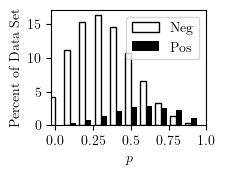


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Pred_Wide.png


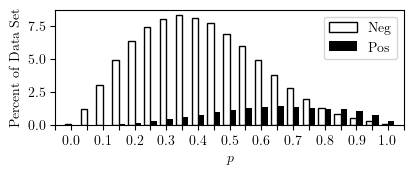


ROC()
BRFC_5_Fold_alpha_0_5_Hard_Test
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_ROC.png


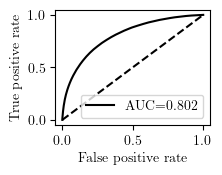


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_100
Value_Counts_y_proba
713566 4064
163
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_100_Pred.png


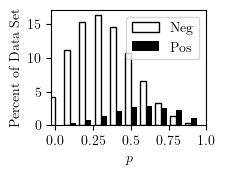


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_100_Pred_Wide.png


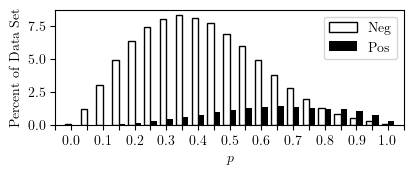


ROC()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_100
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_100_ROC.png


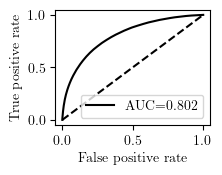


Linear_Transform_y_proba()

a = 0.040, b = 0.970

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_98
Value_Counts_y_proba
713566 4024
155
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_98_Pred.png


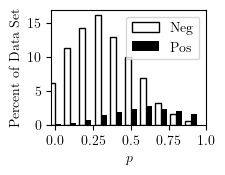


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_98_Pred_Wide.png


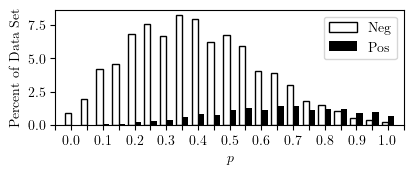


ROC()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_98
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_98_ROC.png


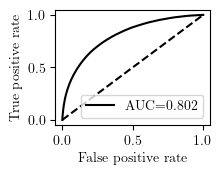


Linear_Transform_y_proba()

a = 0.070, b = 0.950

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_95
Value_Counts_y_proba
713566 3847
149
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_95_Pred.png


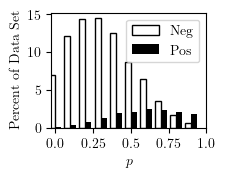


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_95_Pred_Wide.png


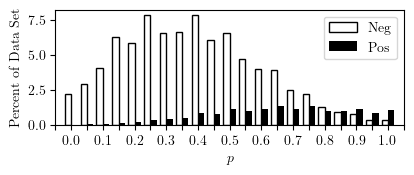


ROC()
BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_95
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Hard_Test_Transformed_95_ROC.png


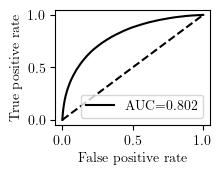





------------------------

BRFC_5_Fold_alpha_balanced_Hard

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test
Value_Counts_y_proba
713566 6294
168
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Pred.png


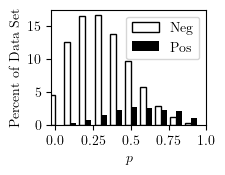


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Pred_Wide.png


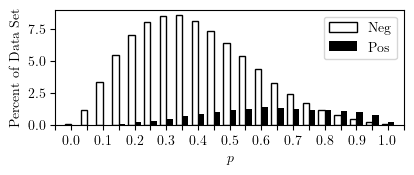


ROC()
BRFC_5_Fold_alpha_balanced_Hard_Test
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_ROC.png


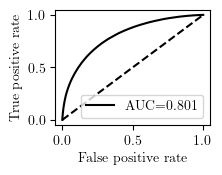


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_100
Value_Counts_y_proba
713566 6294
168
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_100_Pred.png


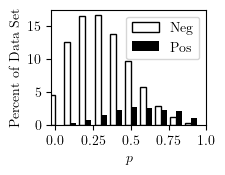


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_100_Pred_Wide.png


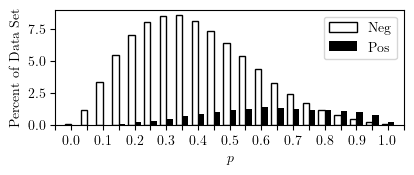


ROC()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_100
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_100_ROC.png


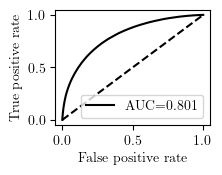


Linear_Transform_y_proba()

a = 0.040, b = 0.970

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_98
Value_Counts_y_proba
713566 6236
161
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_98_Pred.png


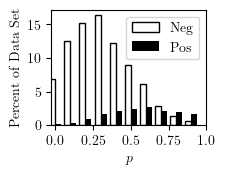


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_98_Pred_Wide.png


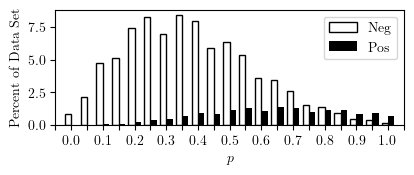


ROC()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_98
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_98_ROC.png


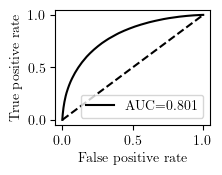


Linear_Transform_y_proba()

a = 0.070, b = 0.940

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_95
Value_Counts_y_proba
713566 6021
153
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_95_Pred.png


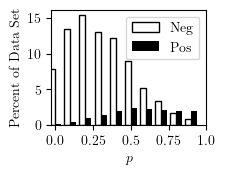


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_95_Pred_Wide.png


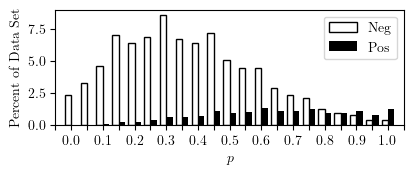


ROC()
BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_95
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Hard_Test_Transformed_95_ROC.png


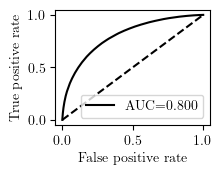




CPU times: user 10min 16s, sys: 30.1 s, total: 10min 46s
Wall time: 10min 52s


0

In [59]:
%%time
Run_with_Hard_Features()

Get_Data()
data.shape:  (747342, 82)
End Get_Data()

Remove_Pedestrian_Crashes()


0    713566
1     32648
2      1128
Name: PEDS, dtype: int64

Removing 33776 crashes that involve a pedestrian.
Feature_Engineering_Cross_Two

Really_Thin_Features()
data.shape:  (713566, 22)
End Thin_Features()

Get_Dummies

p =  5.328688880808152
alpha_balanced =  0.8419893885078605

------------------------

BRFC_5_Fold_alpha_0_5_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test
Value_Counts_y_proba
713566 41936
14233
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Pred.png


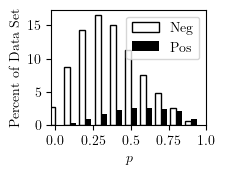


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Pred_Wide.png


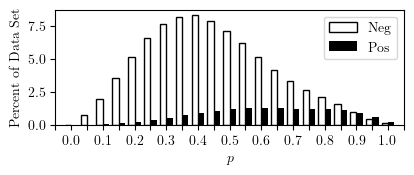


ROC()
BRFC_5_Fold_alpha_0_5_Medium_Test
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_ROC.png


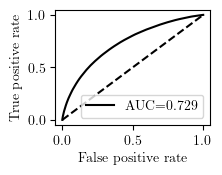


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 41936
14233
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_100_Pred.png


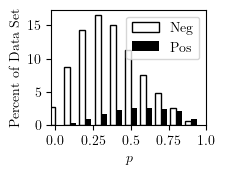


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_100_Pred_Wide.png


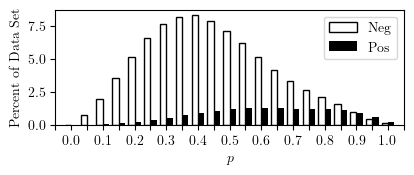


ROC()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_100
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_100_ROC.png


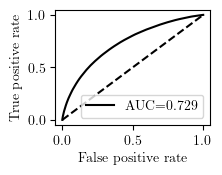


Linear_Transform_y_proba()

a = 0.055, b = 0.970

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 41526
13945
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_98_Pred.png


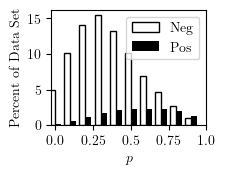


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_98_Pred_Wide.png


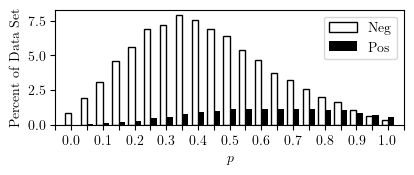


ROC()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_98
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_98_ROC.png


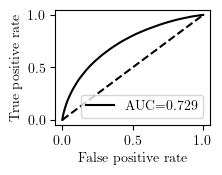


Linear_Transform_y_proba()

a = 0.090, b = 0.940

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 39662
12806
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_95_Pred.png


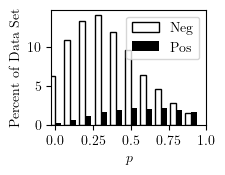


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_95_Pred_Wide.png


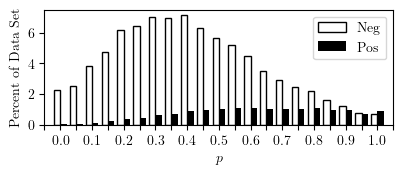


ROC()
BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_95
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Medium_Test_Transformed_95_ROC.png


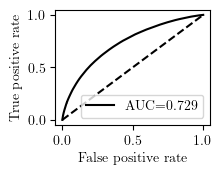





------------------------

BRFC_5_Fold_alpha_balanced_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test
Value_Counts_y_proba
713566 129478
93800
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Pred.png


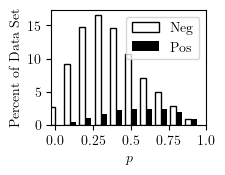


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Pred_Wide.png


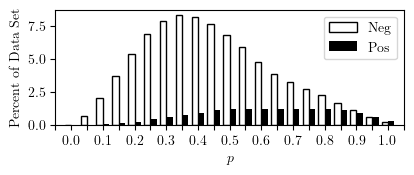


ROC()
BRFC_5_Fold_alpha_balanced_Medium_Test
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_ROC.png


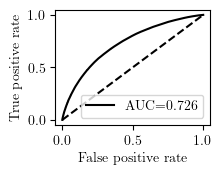


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 129478
93800
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_100_Pred.png


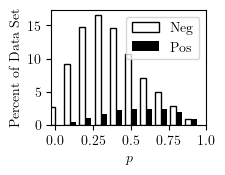


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_100_Pred_Wide.png


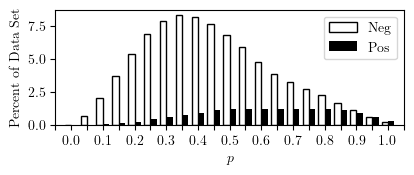


ROC()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_100
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_100_ROC.png


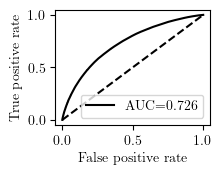


Linear_Transform_y_proba()

a = 0.059, b = 0.970

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 127406
91728
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_98_Pred.png


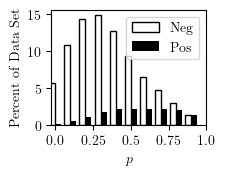


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_98_Pred_Wide.png


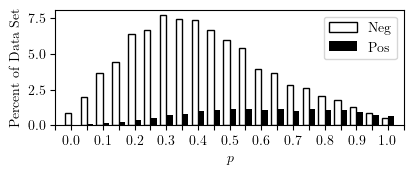


ROC()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_98
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_98_ROC.png


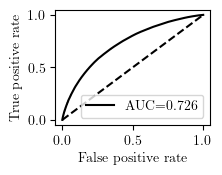


Linear_Transform_y_proba()

a = 0.090, b = 0.941

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 125438
89760
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_95_Pred.png


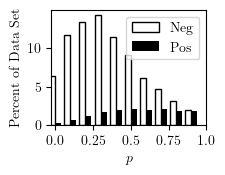


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_95_Pred_Wide.png


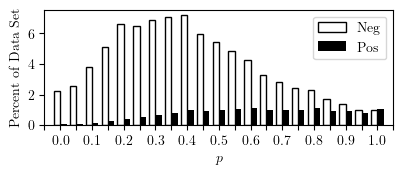


ROC()
BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_95
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Medium_Test_Transformed_95_ROC.png


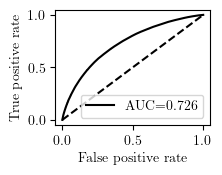





------------------------

LogReg_5_Fold_alpha_0_5_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test
Value_Counts_y_proba
713566 653611
617933
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Pred.png


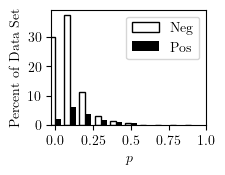


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Pred_Wide.png


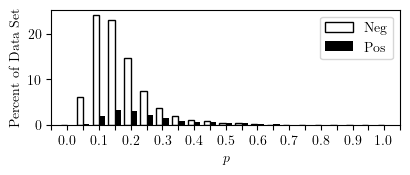


ROC()
LogReg_5_Fold_alpha_0_5_Medium_Test
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_ROC.png


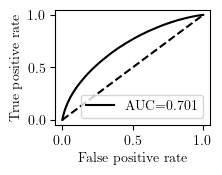


Linear_Transform_y_proba()

a = 0.011, b = 0.834

Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 653611
617933
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_100_Pred.png


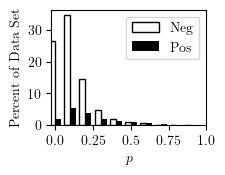


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_100_Pred_Wide.png


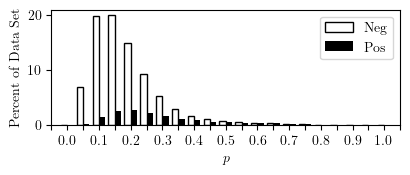


ROC()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_100
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_100_ROC.png


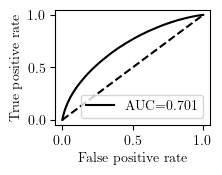


Linear_Transform_y_proba()

a = 0.033, b = 0.614

Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 646082
610404
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_98_Pred.png


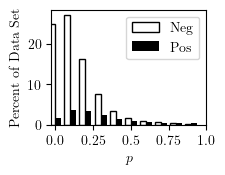


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_98_Pred_Wide.png


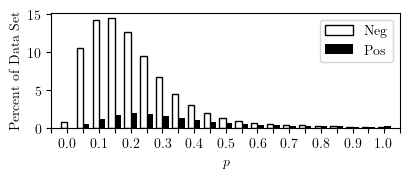


ROC()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_98
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_98_ROC.png


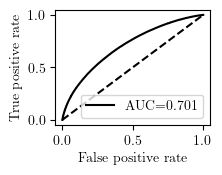


Linear_Transform_y_proba()

a = 0.039, b = 0.558

Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 634601
598923
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_95_Pred.png


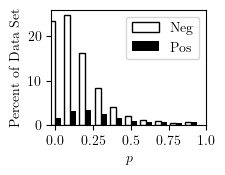


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_95_Pred_Wide.png


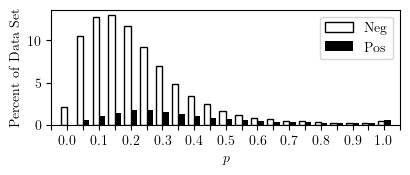


ROC()
LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_95
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Medium_Test_Transformed_95_ROC.png


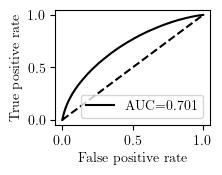





------------------------

LogReg_5_Fold_alpha_balanced_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test
Value_Counts_y_proba
713566 653611
617933
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Pred.png


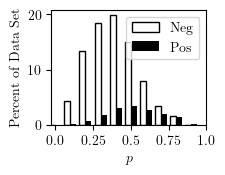


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Pred_Wide.png


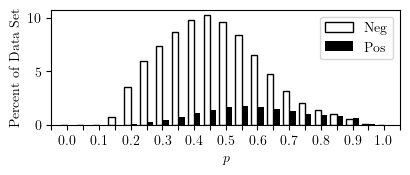


ROC()
LogReg_5_Fold_alpha_balanced_Medium_Test
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_ROC.png


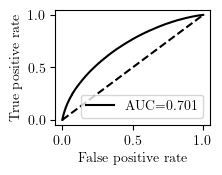


Linear_Transform_y_proba()

a = 0.056, b = 0.964

Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 653611
617933
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_100_Pred.png


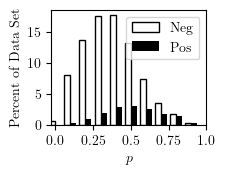


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_100_Pred_Wide.png


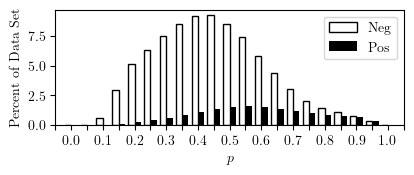


ROC()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_100
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_100_ROC.png


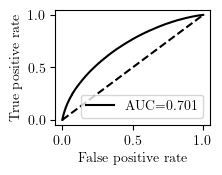


Linear_Transform_y_proba()

a = 0.151, b = 0.898

Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 646070
610392
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_98_Pred.png


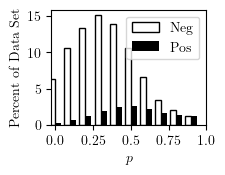


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_98_Pred_Wide.png


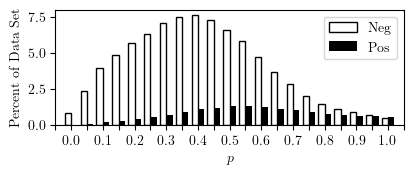


ROC()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_98
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_98_ROC.png


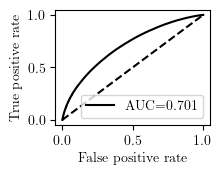


Linear_Transform_y_proba()

a = 0.174, b = 0.875

Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 634593
598915
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_95_Pred.png


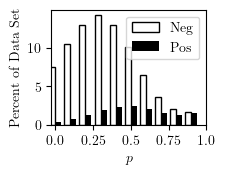


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_95_Pred_Wide.png


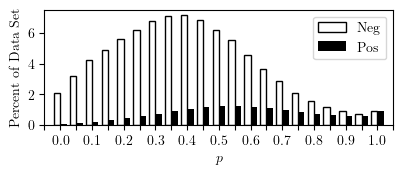


ROC()
LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_95
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Medium_Test_Transformed_95_ROC.png


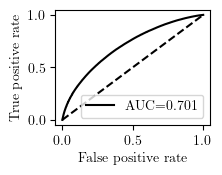





------------------------

AdaBoost_5_Fold_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
AdaBoost_5_Fold_Medium_Test
Value_Counts_y_proba
713566 647530
611852
Finished
Plot_Prediction()
AdaBoost_5_Fold_Medium_Test
./Images/AdaBoost_5_Fold_Medium_Test_Pred.png


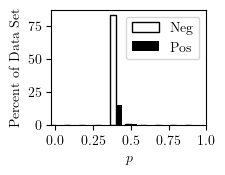


Plot_Prediction()
AdaBoost_5_Fold_Medium_Test
./Images/AdaBoost_5_Fold_Medium_Test_Pred_Wide.png


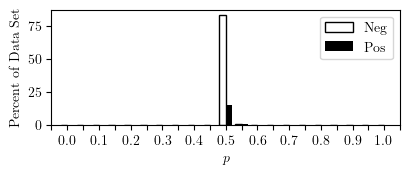


ROC()
AdaBoost_5_Fold_Medium_Test
p_values =  []
./Images/AdaBoost_5_Fold_Medium_Test_ROC.png


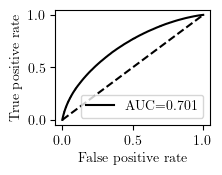


Linear_Transform_y_proba()

a = 0.489, b = 0.504

Analyze_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 647530
611852
Finished
Plot_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_100
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_100_Pred.png


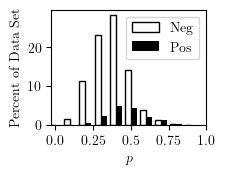


Plot_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_100
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_100_Pred_Wide.png


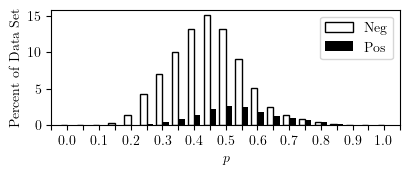


ROC()
AdaBoost_5_Fold_Medium_Test_Transformed_100
p_values =  []
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_100_ROC.png


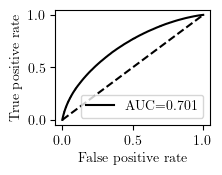


Linear_Transform_y_proba()

a = 0.492, b = 0.501

Analyze_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 640033
604355
Finished
Plot_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_98
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_98_Pred.png


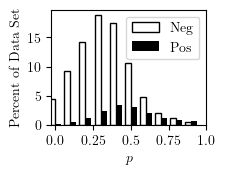


Plot_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_98
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_98_Pred_Wide.png


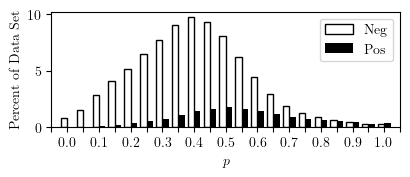


ROC()
AdaBoost_5_Fold_Medium_Test_Transformed_98
p_values =  []
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_98_ROC.png


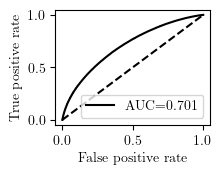


Linear_Transform_y_proba()

a = 0.492, b = 0.501

Analyze_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 628701
593023
Finished
Plot_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_95
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_95_Pred.png


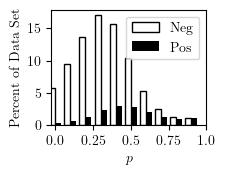


Plot_Prediction()
AdaBoost_5_Fold_Medium_Test_Transformed_95
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_95_Pred_Wide.png


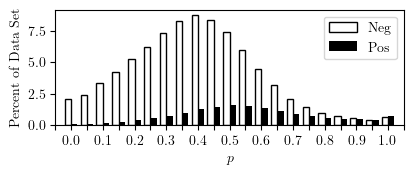


ROC()
AdaBoost_5_Fold_Medium_Test_Transformed_95
p_values =  []
./Images/AdaBoost_5_Fold_Medium_Test_Transformed_95_ROC.png


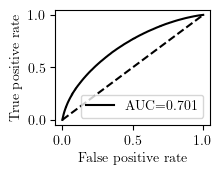





------------------------

BalBag_5_Fold_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BalBag_5_Fold_Medium_Test
Value_Counts_y_proba
713566 2778
66
Finished
Plot_Prediction()
BalBag_5_Fold_Medium_Test
./Images/BalBag_5_Fold_Medium_Test_Pred.png


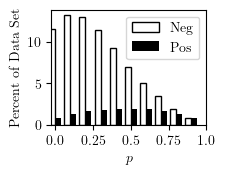


Plot_Prediction()
BalBag_5_Fold_Medium_Test
./Images/BalBag_5_Fold_Medium_Test_Pred_Wide.png


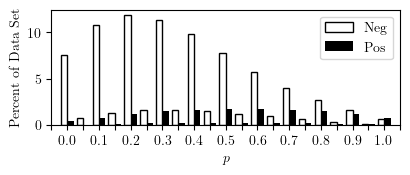


ROC()
BalBag_5_Fold_Medium_Test
p_values =  []
./Images/BalBag_5_Fold_Medium_Test_ROC.png


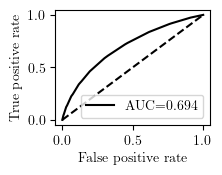


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 2778
66
Finished
Plot_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_100
./Images/BalBag_5_Fold_Medium_Test_Transformed_100_Pred.png


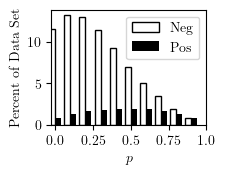


Plot_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_100
./Images/BalBag_5_Fold_Medium_Test_Transformed_100_Pred_Wide.png


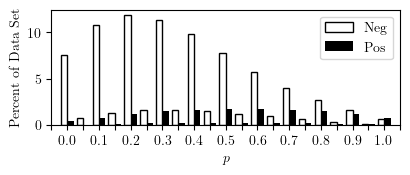


ROC()
BalBag_5_Fold_Medium_Test_Transformed_100
p_values =  []
./Images/BalBag_5_Fold_Medium_Test_Transformed_100_ROC.png


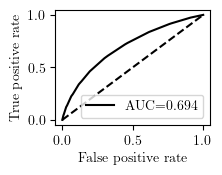


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 2778
66
Finished
Plot_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_98
./Images/BalBag_5_Fold_Medium_Test_Transformed_98_Pred.png


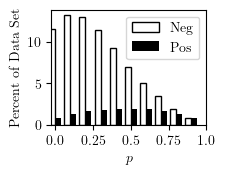


Plot_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_98
./Images/BalBag_5_Fold_Medium_Test_Transformed_98_Pred_Wide.png


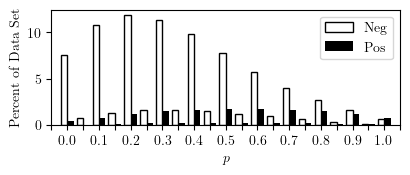


ROC()
BalBag_5_Fold_Medium_Test_Transformed_98
p_values =  []
./Images/BalBag_5_Fold_Medium_Test_Transformed_98_ROC.png


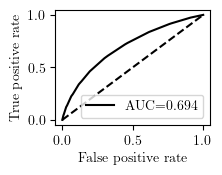


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 2778
66
Finished
Plot_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_95
./Images/BalBag_5_Fold_Medium_Test_Transformed_95_Pred.png


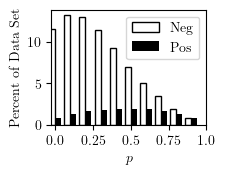


Plot_Prediction()
BalBag_5_Fold_Medium_Test_Transformed_95
./Images/BalBag_5_Fold_Medium_Test_Transformed_95_Pred_Wide.png


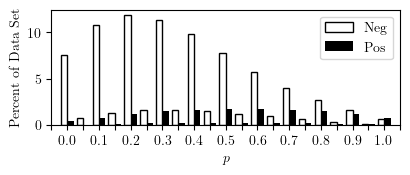


ROC()
BalBag_5_Fold_Medium_Test_Transformed_95
p_values =  []
./Images/BalBag_5_Fold_Medium_Test_Transformed_95_ROC.png


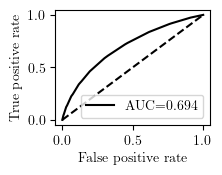





------------------------

EEC_5_Fold_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
EEC_5_Fold_Medium_Test
Value_Counts_y_proba
713566 2242
747
Finished
Plot_Prediction()
EEC_5_Fold_Medium_Test
./Images/EEC_5_Fold_Medium_Test_Pred.png


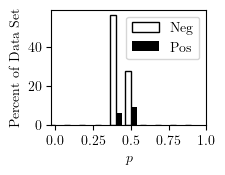


Plot_Prediction()
EEC_5_Fold_Medium_Test
./Images/EEC_5_Fold_Medium_Test_Pred_Wide.png


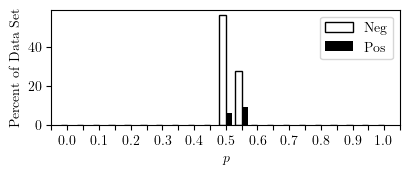


ROC()
EEC_5_Fold_Medium_Test
p_values =  []
./Images/EEC_5_Fold_Medium_Test_ROC.png


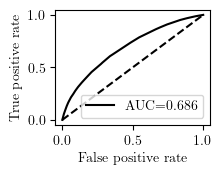


Linear_Transform_y_proba()

a = 0.457, b = 0.571

Analyze_Prediction()
EEC_5_Fold_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 2242
747
Finished
Plot_Prediction()
EEC_5_Fold_Medium_Test_Transformed_100
./Images/EEC_5_Fold_Medium_Test_Transformed_100_Pred.png


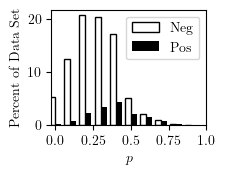


Plot_Prediction()
EEC_5_Fold_Medium_Test_Transformed_100
./Images/EEC_5_Fold_Medium_Test_Transformed_100_Pred_Wide.png


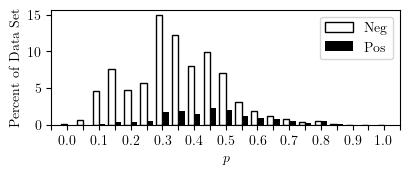


ROC()
EEC_5_Fold_Medium_Test_Transformed_100
p_values =  []
./Images/EEC_5_Fold_Medium_Test_Transformed_100_ROC.png


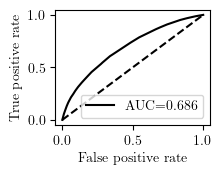


Linear_Transform_y_proba()

a = 0.463, b = 0.550

Analyze_Prediction()
EEC_5_Fold_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 2130
724
Finished
Plot_Prediction()
EEC_5_Fold_Medium_Test_Transformed_98
./Images/EEC_5_Fold_Medium_Test_Transformed_98_Pred.png


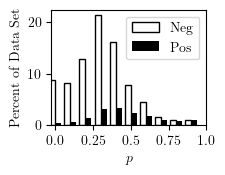


Plot_Prediction()
EEC_5_Fold_Medium_Test_Transformed_98
./Images/EEC_5_Fold_Medium_Test_Transformed_98_Pred_Wide.png


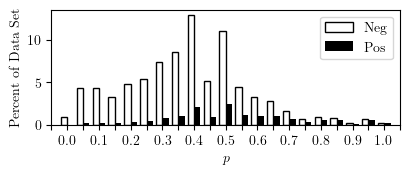


ROC()
EEC_5_Fold_Medium_Test_Transformed_98
p_values =  []
./Images/EEC_5_Fold_Medium_Test_Transformed_98_ROC.png


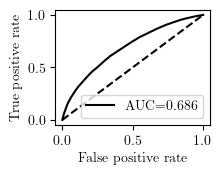


Linear_Transform_y_proba()

a = 0.465, b = 0.545

Analyze_Prediction()
EEC_5_Fold_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 2048
691
Finished
Plot_Prediction()
EEC_5_Fold_Medium_Test_Transformed_95
./Images/EEC_5_Fold_Medium_Test_Transformed_95_Pred.png


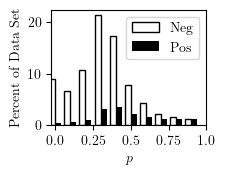


Plot_Prediction()
EEC_5_Fold_Medium_Test_Transformed_95
./Images/EEC_5_Fold_Medium_Test_Transformed_95_Pred_Wide.png


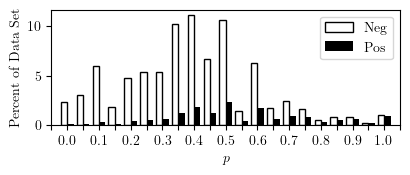


ROC()
EEC_5_Fold_Medium_Test_Transformed_95
p_values =  []
./Images/EEC_5_Fold_Medium_Test_Transformed_95_ROC.png


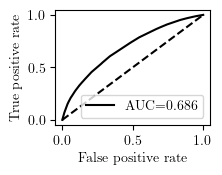





------------------------

RUSBoost_5_Fold_Medium

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
RUSBoost_5_Fold_Medium_Test
Value_Counts_y_proba
713566 652426
616748
Finished
Plot_Prediction()
RUSBoost_5_Fold_Medium_Test
./Images/RUSBoost_5_Fold_Medium_Test_Pred.png


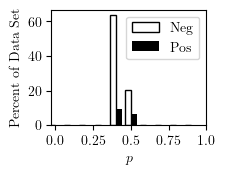


Plot_Prediction()
RUSBoost_5_Fold_Medium_Test
./Images/RUSBoost_5_Fold_Medium_Test_Pred_Wide.png


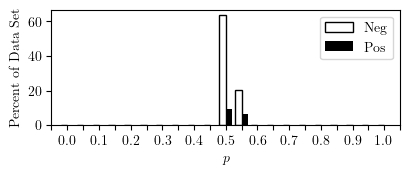


ROC()
RUSBoost_5_Fold_Medium_Test
p_values =  []
./Images/RUSBoost_5_Fold_Medium_Test_ROC.png


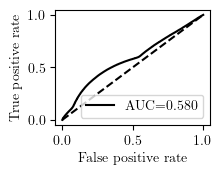


Linear_Transform_y_proba()

a = 0.490, b = 0.513

Analyze_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 652426
616748
Finished
Plot_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_100
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_100_Pred.png


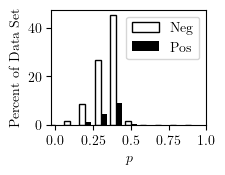


Plot_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_100
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_100_Pred_Wide.png


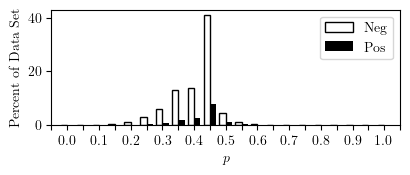


ROC()
RUSBoost_5_Fold_Medium_Test_Transformed_100
p_values =  []
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_100_ROC.png


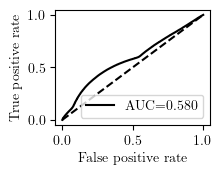


Linear_Transform_y_proba()

a = 0.494, b = 0.503

Analyze_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 642977
607299
Finished
Plot_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_98
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_98_Pred.png


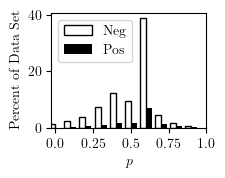


Plot_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_98
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_98_Pred_Wide.png


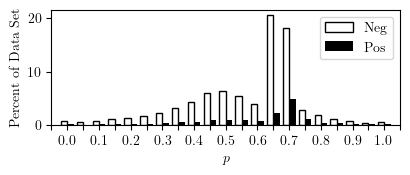


ROC()
RUSBoost_5_Fold_Medium_Test_Transformed_98
p_values =  []
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_98_ROC.png


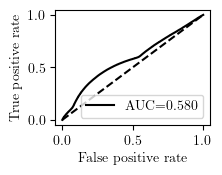


Linear_Transform_y_proba()

a = 0.495, b = 0.502

Analyze_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 628139
592461
Finished
Plot_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_95
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_95_Pred.png


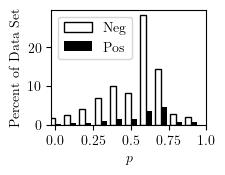


Plot_Prediction()
RUSBoost_5_Fold_Medium_Test_Transformed_95
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_95_Pred_Wide.png


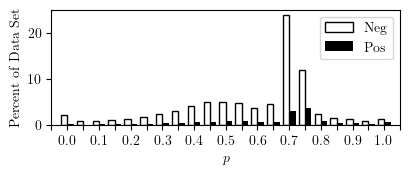


ROC()
RUSBoost_5_Fold_Medium_Test_Transformed_95
p_values =  []
./Images/RUSBoost_5_Fold_Medium_Test_Transformed_95_ROC.png


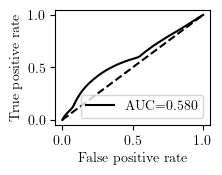





------------------------

KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium

K-fold iteration =  0
data.shape =  (713566, 94) 94
y_proba_fold
[0.11649939, 0.0062957825, 0.11047223, 0.16985036, 0.18895067, 0.115849435, 0.07116839, 0.17920265, 0.029362235, 0.036228374]
K-fold iteration =  1
data.shape =  (713566, 94) 94
y_proba_fold
[0.12708649, 0.102228574, 0.17285438, 0.109143145, 0.18498585, 0.2289686, 0.13546363, 0.0792949, 0.09065281, 0.06270692]
K-fold iteration =  2
data.shape =  (713566, 94) 94
y_proba_fold
[0.24487075, 0.05437081, 0.14884494, 0.048304524, 0.11635117, 0.080916405, 0.07256869, 0.16519241, 0.1008786, 0.15357247]
K-fold iteration =  3
data.shape =  (713566, 94) 94
y_proba_fold
[0.06122134, 0.15683307, 0.21373872, 0.16305748, 0.115368, 0.1047524, 0.38799867, 0.32353354, 0.41567725, 0.082593665]
K-fold iteration =  4
data.shape =  (713566, 94) 94
y_proba_fold
[0.2205885, 0.111869864, 0.094512425, 0.06842258, 0.14818805, 0.08257903, 0.13664299, 0.37035325, 0.4970262, 0.102244

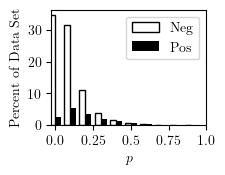


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Pred_Wide.png


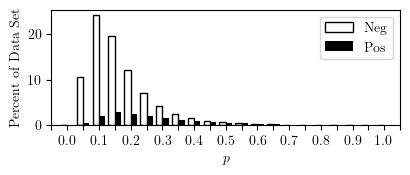


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_ROC.png


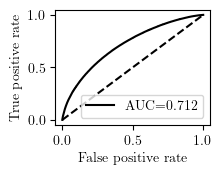


Linear_Transform_y_proba()

a = 0.001, b = 0.880

Analyze_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 639048
603370
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_100_Pred.png


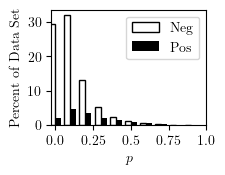


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_100_Pred_Wide.png


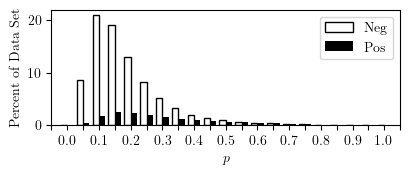


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_100
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_100_ROC.png


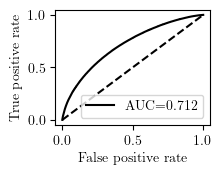


Linear_Transform_y_proba()

a = 0.019, b = 0.671

Analyze_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 631184
595506
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_98_Pred.png


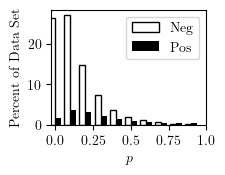


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_98_Pred_Wide.png


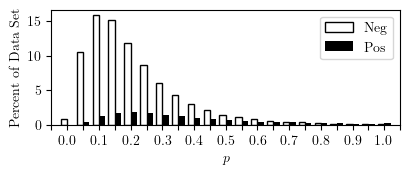


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_98
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_98_ROC.png


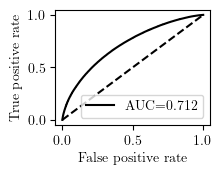


Linear_Transform_y_proba()

a = 0.026, b = 0.609

Analyze_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 620617
584939
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_95_Pred.png


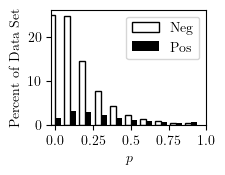


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_95_Pred_Wide.png


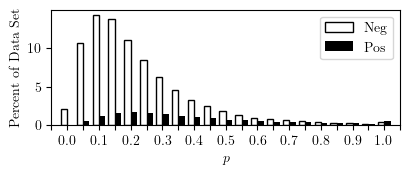


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_95
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Medium_Test_Transformed_95_ROC.png


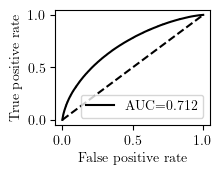





------------------------

KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium

K-fold iteration =  0
data.shape =  (713566, 94) 94
y_proba_fold
[0.30209896, 0.023000505, 0.32577005, 0.6376656, 0.5944082, 0.4379465, 0.17317732, 0.5974552, 0.23730904, 0.24179196]
K-fold iteration =  1
data.shape =  (713566, 94) 94
y_proba_fold
[0.26156473, 0.3506226, 0.38653335, 0.3004206, 0.40709722, 0.6672756, 0.3102156, 0.305016, 0.3775197, 0.18147503]
K-fold iteration =  2
data.shape =  (713566, 94) 94
y_proba_fold
[0.56658435, 0.22160062, 0.48941532, 0.24668187, 0.4611658, 0.21048133, 0.31432378, 0.5646154, 0.4261305, 0.5176824]
K-fold iteration =  3
data.shape =  (713566, 94) 94
y_proba_fold
[0.3023108, 0.45686498, 0.4592443, 0.482834, 0.42900828, 0.2897322, 0.7273128, 0.7204294, 0.78063947, 0.07799314]
K-fold iteration =  4
data.shape =  (713566, 94) 94
y_proba_fold
[0.54664075, 0.331652, 0.36151186, 0.306129, 0.429635, 0.29591745, 0.33390278, 0.7272269, 0.749821, 0.373003]
Analyze_Prediction()
KBFC_5

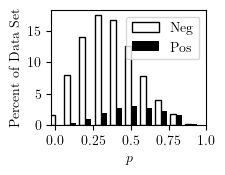


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Pred_Wide.png


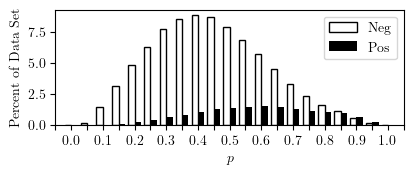


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_ROC.png


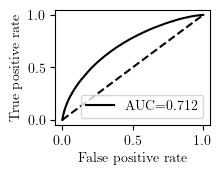


Linear_Transform_y_proba()

a = 0.002, b = 0.974

Analyze_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_100
Value_Counts_y_proba
713566 638730
603052
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_100_Pred.png


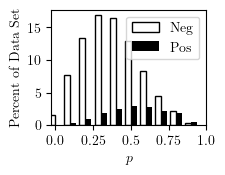


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_100_Pred_Wide.png


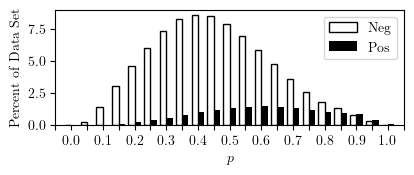


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_100
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_100_ROC.png


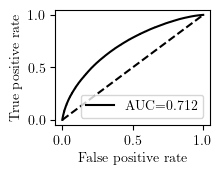


Linear_Transform_y_proba()

a = 0.079, b = 0.910

Analyze_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_98
Value_Counts_y_proba
713566 631402
595724
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_98_Pred.png


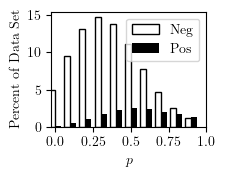


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_98_Pred_Wide.png


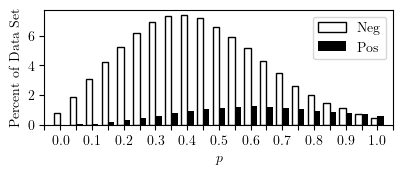


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_98
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_98_ROC.png


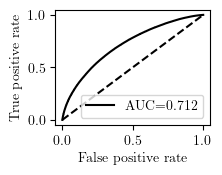


Linear_Transform_y_proba()

a = 0.110, b = 0.885

Analyze_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_95
Value_Counts_y_proba
713566 620407
584729
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_95_Pred.png


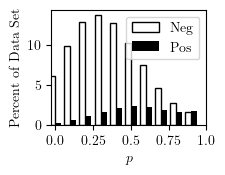


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_95_Pred_Wide.png


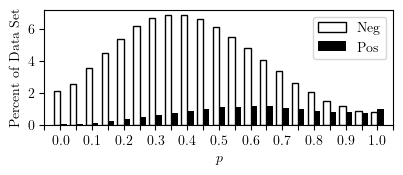


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_95
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Medium_Test_Transformed_95_ROC.png


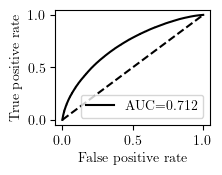




CPU times: user 2h 21min 37s, sys: 3min 35s, total: 2h 25min 12s
Wall time: 2h 20min 13s


In [53]:
%%time
#Run_with_Medium_Features()

Get_Data()
data.shape:  (747342, 82)
End Get_Data()

Remove_Pedestrian_Crashes()


0    713566
1     32648
2      1128
Name: PEDS, dtype: int64

Removing 33776 crashes that involve a pedestrian.
Feature_Engineering_Cross_Two

Thin_to_Minimal_Features()
data.shape:  (713566, 10)
End Thin_Features()

Get_Dummies

p =  5.328688880808152
alpha_balanced =  0.8419893885078605

------------------------

BRFC_5_Fold_alpha_0_5_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test
Value_Counts_y_proba
713566 138345
102667
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Pred.png


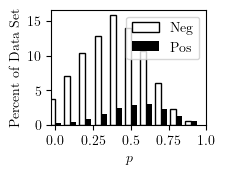


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Pred_Wide.png


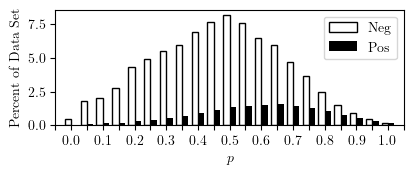


ROC()
BRFC_5_Fold_alpha_0_5_Easy_Test
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_ROC.png


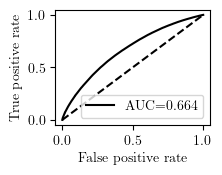


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 138345
102667
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_100_Pred.png


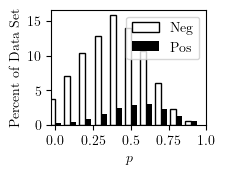


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_100_Pred_Wide.png


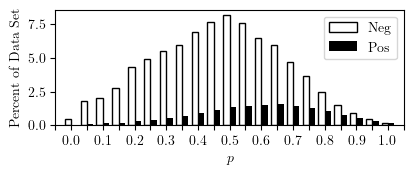


ROC()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_100
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_100_ROC.png


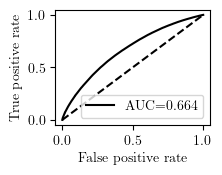


Linear_Transform_y_proba()

a = 0.011, b = 0.958

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 137150
101472
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_98_Pred.png


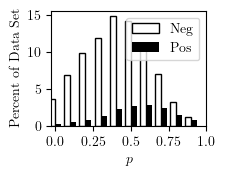


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_98_Pred_Wide.png


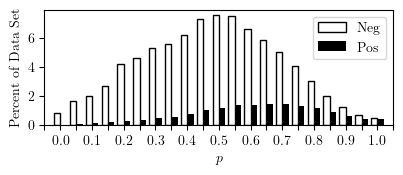


ROC()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_98
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_98_ROC.png


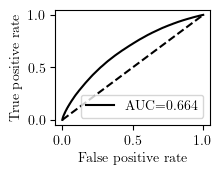


Linear_Transform_y_proba()

a = 0.047, b = 0.918

Analyze_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 133592
97914
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_95_Pred.png


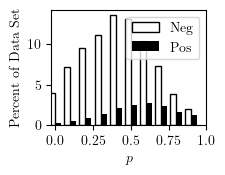


Plot_Prediction()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_95_Pred_Wide.png


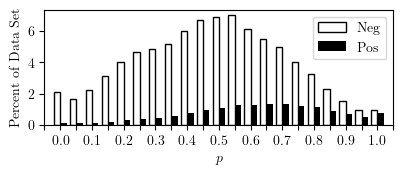


ROC()
BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_95
p_values =  []
./Images/BRFC_5_Fold_alpha_0_5_Easy_Test_Transformed_95_ROC.png


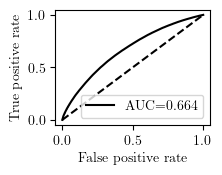





------------------------

BRFC_5_Fold_alpha_balanced_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test
Value_Counts_y_proba
713566 143777
108099
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Pred.png


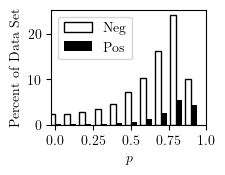


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Pred_Wide.png


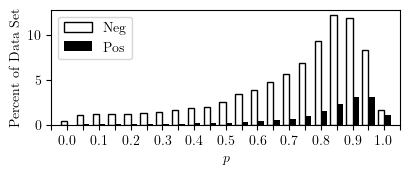


ROC()
BRFC_5_Fold_alpha_balanced_Easy_Test
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_ROC.png


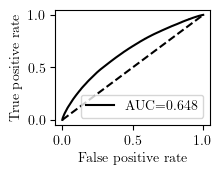


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 143777
108099
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_100_Pred.png


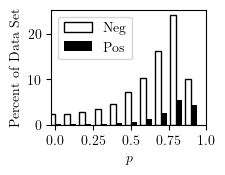


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_100
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_100_Pred_Wide.png


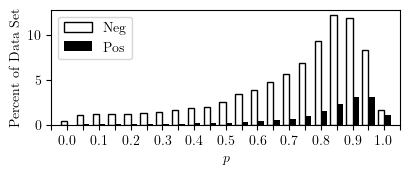


ROC()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_100
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_100_ROC.png


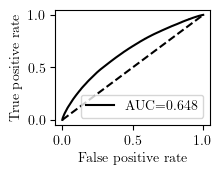


Linear_Transform_y_proba()

a = 0.017, b = 0.985

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 142694
107016
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_98_Pred.png


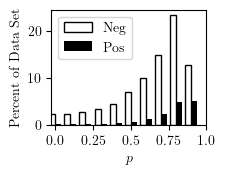


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_98
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_98_Pred_Wide.png


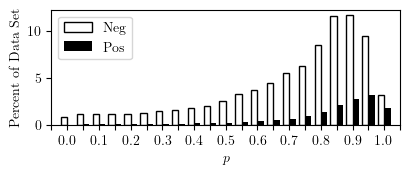


ROC()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_98
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_98_ROC.png


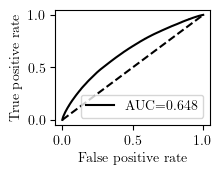


Linear_Transform_y_proba()

a = 0.070, b = 0.972

Analyze_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 138978
103300
Finished
Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_95_Pred.png


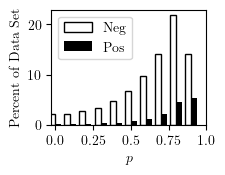


Plot_Prediction()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_95
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_95_Pred_Wide.png


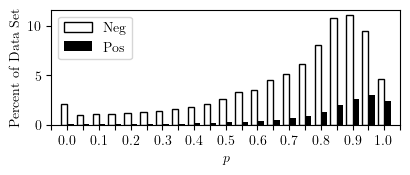


ROC()
BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_95
p_values =  []
./Images/BRFC_5_Fold_alpha_balanced_Easy_Test_Transformed_95_ROC.png


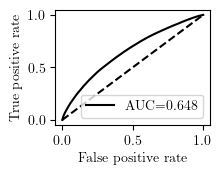





------------------------

LogReg_5_Fold_alpha_0_5_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Pred.png


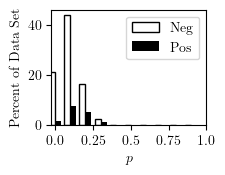


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Pred_Wide.png


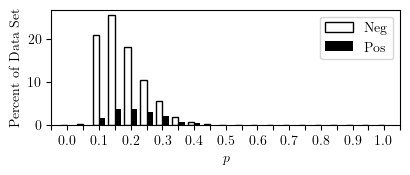


ROC()
LogReg_5_Fold_alpha_0_5_Easy_Test
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_ROC.png


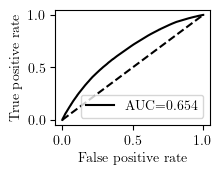


Linear_Transform_y_proba()

a = 0.039, b = 0.491

Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_100_Pred.png


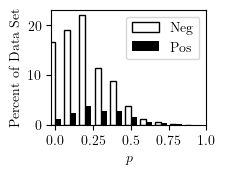


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_100_Pred_Wide.png


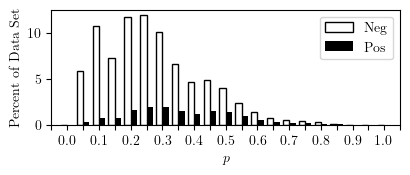


ROC()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_100
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_100_ROC.png


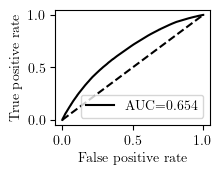


Linear_Transform_y_proba()

a = 0.053, b = 0.399

Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 142775
107097
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_98_Pred.png


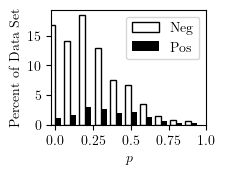


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_98_Pred_Wide.png


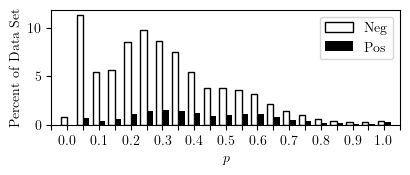


ROC()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_98
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_98_ROC.png


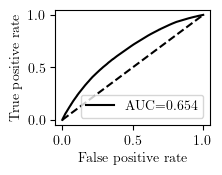


Linear_Transform_y_proba()

a = 0.056, b = 0.366

Analyze_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 140124
104446
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_95_Pred.png


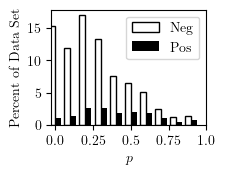


Plot_Prediction()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_95_Pred_Wide.png


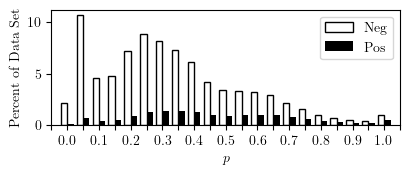


ROC()
LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_95
p_values =  []
./Images/LogReg_5_Fold_alpha_0_5_Easy_Test_Transformed_95_ROC.png


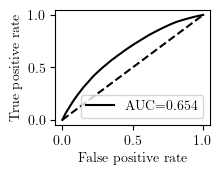





------------------------

LogReg_5_Fold_alpha_balanced_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Pred.png


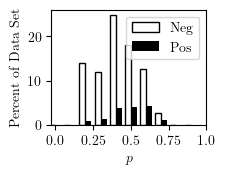


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Pred_Wide.png


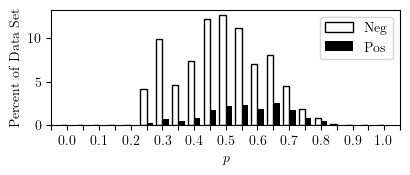


ROC()
LogReg_5_Fold_alpha_balanced_Easy_Test
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_ROC.png


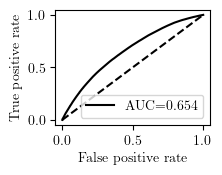


Linear_Transform_y_proba()

a = 0.176, b = 0.839

Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_100_Pred.png


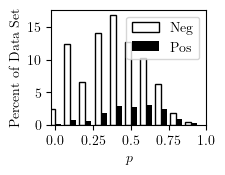


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_100
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_100_Pred_Wide.png


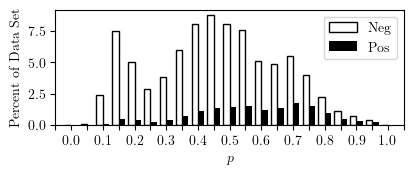


ROC()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_100
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_100_ROC.png


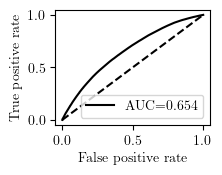


Linear_Transform_y_proba()

a = 0.229, b = 0.784

Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 142875
107197
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_98_Pred.png


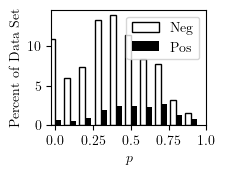


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_98
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_98_Pred_Wide.png


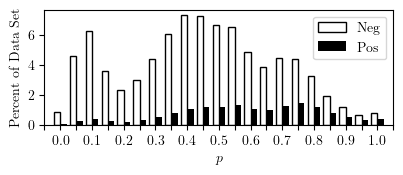


ROC()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_98
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_98_ROC.png


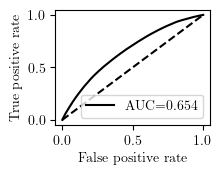


Linear_Transform_y_proba()

a = 0.239, b = 0.759

Analyze_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 140315
104637
Finished
Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_95_Pred.png


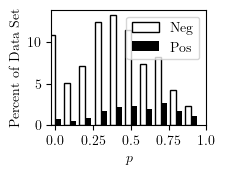


Plot_Prediction()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_95
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_95_Pred_Wide.png


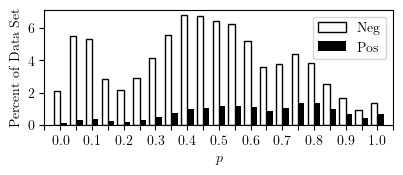


ROC()
LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_95
p_values =  []
./Images/LogReg_5_Fold_alpha_balanced_Easy_Test_Transformed_95_ROC.png


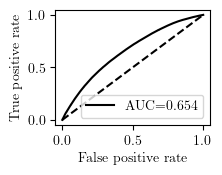





------------------------

AdaBoost_5_Fold_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
AdaBoost_5_Fold_Easy_Test
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
AdaBoost_5_Fold_Easy_Test
./Images/AdaBoost_5_Fold_Easy_Test_Pred.png


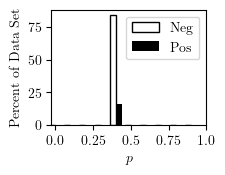


Plot_Prediction()
AdaBoost_5_Fold_Easy_Test
./Images/AdaBoost_5_Fold_Easy_Test_Pred_Wide.png


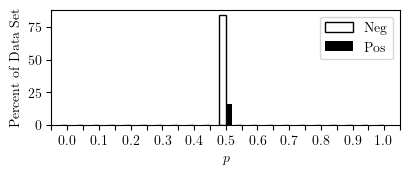


ROC()
AdaBoost_5_Fold_Easy_Test
p_values =  []
./Images/AdaBoost_5_Fold_Easy_Test_ROC.png


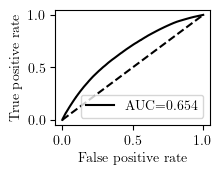


Linear_Transform_y_proba()

a = 0.492, b = 0.500

Analyze_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_100
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_100_Pred.png


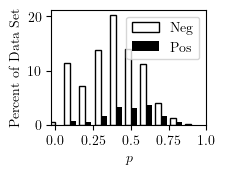


Plot_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_100
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_100_Pred_Wide.png


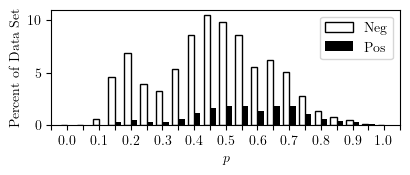


ROC()
AdaBoost_5_Fold_Easy_Test_Transformed_100
p_values =  []
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_100_ROC.png


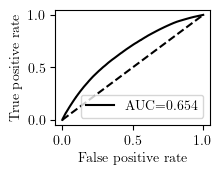


Linear_Transform_y_proba()

a = 0.493, b = 0.499

Analyze_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 142891
107213
Finished
Plot_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_98
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_98_Pred.png


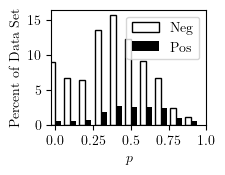


Plot_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_98
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_98_Pred_Wide.png


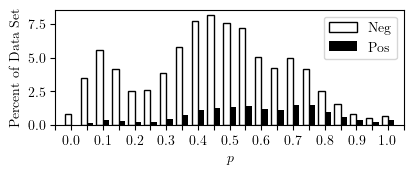


ROC()
AdaBoost_5_Fold_Easy_Test_Transformed_98
p_values =  []
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_98_ROC.png


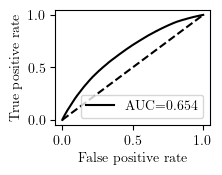


Linear_Transform_y_proba()

a = 0.493, b = 0.499

Analyze_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 140292
104614
Finished
Plot_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_95
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_95_Pred.png


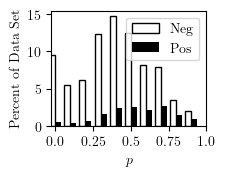


Plot_Prediction()
AdaBoost_5_Fold_Easy_Test_Transformed_95
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_95_Pred_Wide.png


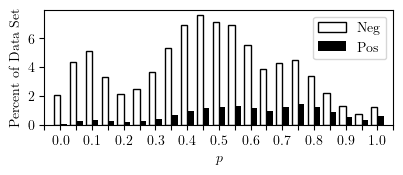


ROC()
AdaBoost_5_Fold_Easy_Test_Transformed_95
p_values =  []
./Images/AdaBoost_5_Fold_Easy_Test_Transformed_95_ROC.png


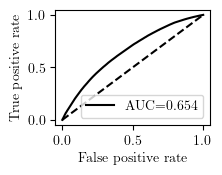





------------------------

BalBag_5_Fold_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
BalBag_5_Fold_Easy_Test
Value_Counts_y_proba
713566 52106
35906
Finished
Plot_Prediction()
BalBag_5_Fold_Easy_Test
./Images/BalBag_5_Fold_Easy_Test_Pred.png


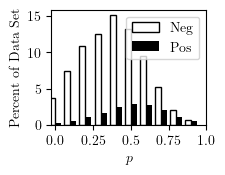


Plot_Prediction()
BalBag_5_Fold_Easy_Test
./Images/BalBag_5_Fold_Easy_Test_Pred_Wide.png


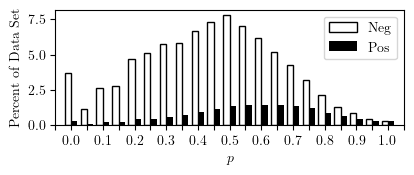


ROC()
BalBag_5_Fold_Easy_Test
p_values =  []
./Images/BalBag_5_Fold_Easy_Test_ROC.png


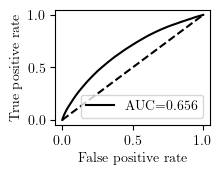


Linear_Transform_y_proba()

a = 0.000, b = 1.000

Analyze_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 52106
35906
Finished
Plot_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_100
./Images/BalBag_5_Fold_Easy_Test_Transformed_100_Pred.png


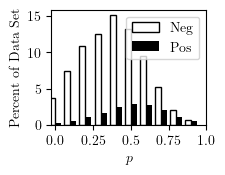


Plot_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_100
./Images/BalBag_5_Fold_Easy_Test_Transformed_100_Pred_Wide.png


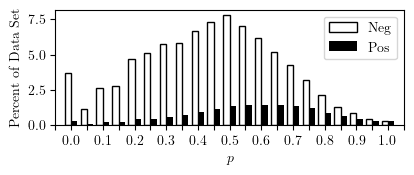


ROC()
BalBag_5_Fold_Easy_Test_Transformed_100
p_values =  []
./Images/BalBag_5_Fold_Easy_Test_Transformed_100_ROC.png


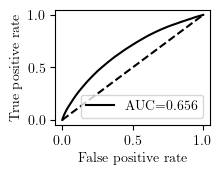


Linear_Transform_y_proba()

a = 0.000, b = 0.980

Analyze_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 52070
35881
Finished
Plot_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_98
./Images/BalBag_5_Fold_Easy_Test_Transformed_98_Pred.png


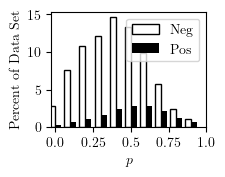


Plot_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_98
./Images/BalBag_5_Fold_Easy_Test_Transformed_98_Pred_Wide.png


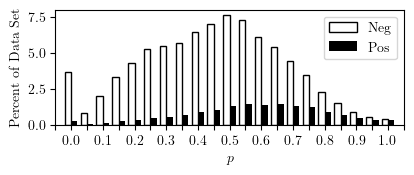


ROC()
BalBag_5_Fold_Easy_Test_Transformed_98
p_values =  []
./Images/BalBag_5_Fold_Easy_Test_Transformed_98_ROC.png


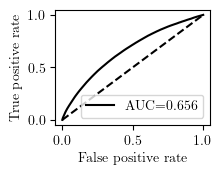


Linear_Transform_y_proba()

a = 0.000, b = 0.925

Analyze_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 51521
35500
Finished
Plot_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_95
./Images/BalBag_5_Fold_Easy_Test_Transformed_95_Pred.png


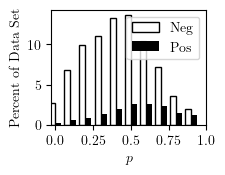


Plot_Prediction()
BalBag_5_Fold_Easy_Test_Transformed_95
./Images/BalBag_5_Fold_Easy_Test_Transformed_95_Pred_Wide.png


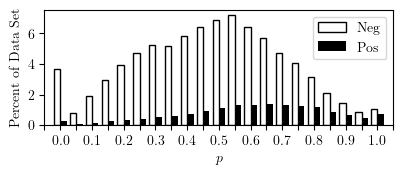


ROC()
BalBag_5_Fold_Easy_Test_Transformed_95
p_values =  []
./Images/BalBag_5_Fold_Easy_Test_Transformed_95_ROC.png


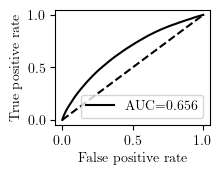





------------------------

EEC_5_Fold_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
EEC_5_Fold_Easy_Test
Value_Counts_y_proba
713566 464
243
Finished
Plot_Prediction()
EEC_5_Fold_Easy_Test
./Images/EEC_5_Fold_Easy_Test_Pred.png


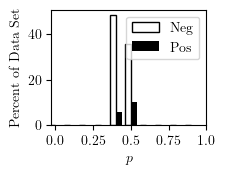


Plot_Prediction()
EEC_5_Fold_Easy_Test
./Images/EEC_5_Fold_Easy_Test_Pred_Wide.png


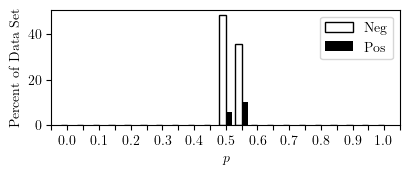


ROC()
EEC_5_Fold_Easy_Test
p_values =  []
./Images/EEC_5_Fold_Easy_Test_ROC.png


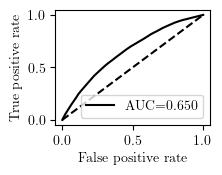


Linear_Transform_y_proba()

a = 0.473, b = 0.535

Analyze_Prediction()
EEC_5_Fold_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 464
243
Finished
Plot_Prediction()
EEC_5_Fold_Easy_Test_Transformed_100
./Images/EEC_5_Fold_Easy_Test_Transformed_100_Pred.png


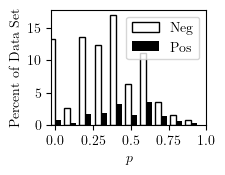


Plot_Prediction()
EEC_5_Fold_Easy_Test_Transformed_100
./Images/EEC_5_Fold_Easy_Test_Transformed_100_Pred_Wide.png


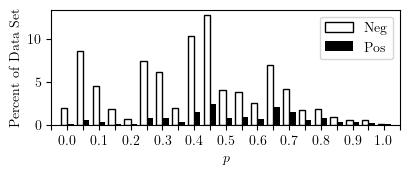


ROC()
EEC_5_Fold_Easy_Test_Transformed_100
p_values =  []
./Images/EEC_5_Fold_Easy_Test_Transformed_100_ROC.png


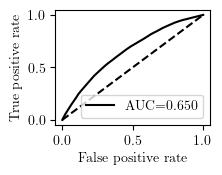


Linear_Transform_y_proba()

a = 0.473, b = 0.531

Analyze_Prediction()
EEC_5_Fold_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 456
238
Finished
Plot_Prediction()
EEC_5_Fold_Easy_Test_Transformed_98
./Images/EEC_5_Fold_Easy_Test_Transformed_98_Pred.png


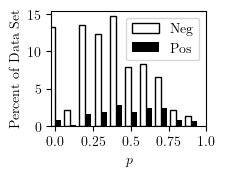


Plot_Prediction()
EEC_5_Fold_Easy_Test_Transformed_98
./Images/EEC_5_Fold_Easy_Test_Transformed_98_Pred_Wide.png


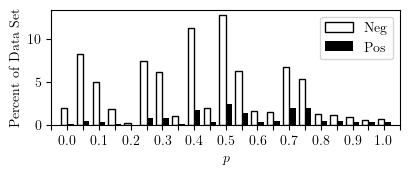


ROC()
EEC_5_Fold_Easy_Test_Transformed_98
p_values =  []
./Images/EEC_5_Fold_Easy_Test_Transformed_98_ROC.png


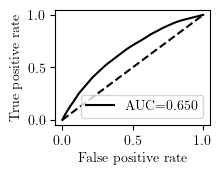


Linear_Transform_y_proba()

a = 0.473, b = 0.527

Analyze_Prediction()
EEC_5_Fold_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 443
228
Finished
Plot_Prediction()
EEC_5_Fold_Easy_Test_Transformed_95
./Images/EEC_5_Fold_Easy_Test_Transformed_95_Pred.png


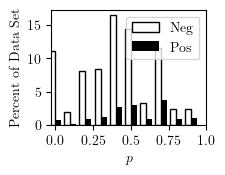


Plot_Prediction()
EEC_5_Fold_Easy_Test_Transformed_95
./Images/EEC_5_Fold_Easy_Test_Transformed_95_Pred_Wide.png


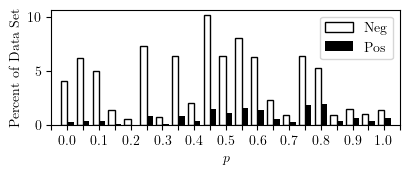


ROC()
EEC_5_Fold_Easy_Test_Transformed_95
p_values =  []
./Images/EEC_5_Fold_Easy_Test_Transformed_95_ROC.png


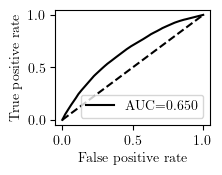





------------------------

RUSBoost_5_Fold_Easy

K-fold iteration =  0
K-fold iteration =  1
K-fold iteration =  2
K-fold iteration =  3
K-fold iteration =  4
Analyze_Prediction()
RUSBoost_5_Fold_Easy_Test
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
RUSBoost_5_Fold_Easy_Test
./Images/RUSBoost_5_Fold_Easy_Test_Pred.png


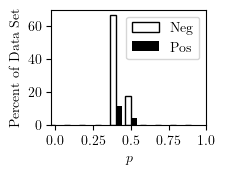


Plot_Prediction()
RUSBoost_5_Fold_Easy_Test
./Images/RUSBoost_5_Fold_Easy_Test_Pred_Wide.png


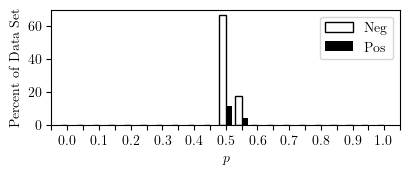


ROC()
RUSBoost_5_Fold_Easy_Test
p_values =  []
./Images/RUSBoost_5_Fold_Easy_Test_ROC.png


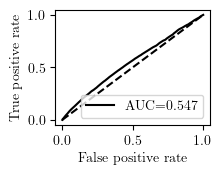


Linear_Transform_y_proba()

a = 0.492, b = 0.522

Analyze_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 145040
109362
Finished
Plot_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_100
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_100_Pred.png


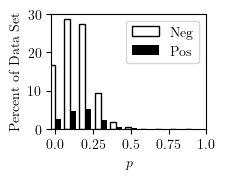


Plot_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_100
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_100_Pred_Wide.png


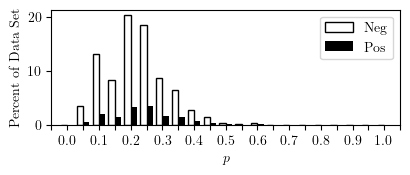


ROC()
RUSBoost_5_Fold_Easy_Test_Transformed_100
p_values =  []
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_100_ROC.png


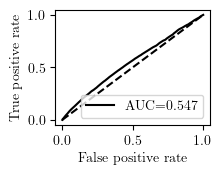


Linear_Transform_y_proba()

a = 0.493, b = 0.508

Analyze_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 142444
106766
Finished
Plot_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_98
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_98_Pred.png


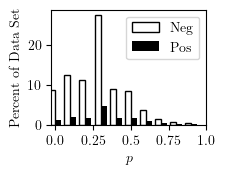


Plot_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_98
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_98_Pred_Wide.png


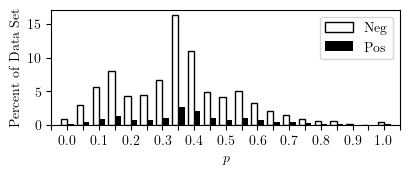


ROC()
RUSBoost_5_Fold_Easy_Test_Transformed_98
p_values =  []
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_98_ROC.png


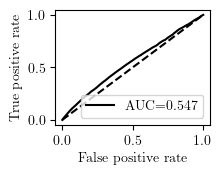


Linear_Transform_y_proba()

a = 0.493, b = 0.505

Analyze_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 138410
102732
Finished
Plot_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_95
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_95_Pred.png


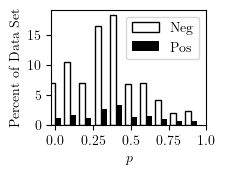


Plot_Prediction()
RUSBoost_5_Fold_Easy_Test_Transformed_95
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_95_Pred_Wide.png


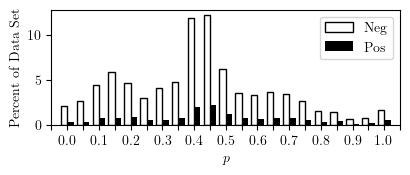


ROC()
RUSBoost_5_Fold_Easy_Test_Transformed_95
p_values =  []
./Images/RUSBoost_5_Fold_Easy_Test_Transformed_95_ROC.png


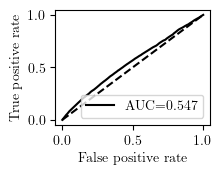





------------------------

KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy

K-fold iteration =  0
data.shape =  (713566, 42) 42
y_proba_fold
[0.07544586, 0.07415705, 0.16829926, 0.16477823, 0.15663129, 0.17282599, 0.1501587, 0.22266977, 0.054254815, 0.06495402]
K-fold iteration =  1
data.shape =  (713566, 42) 42
y_proba_fold
[0.12250954, 0.117547326, 0.20016056, 0.09314992, 0.14102566, 0.08323798, 0.11239241, 0.13424978, 0.21778713, 0.0972489]
K-fold iteration =  2
data.shape =  (713566, 42) 42
y_proba_fold
[0.24082421, 0.11967268, 0.21638991, 0.07100541, 0.16296582, 0.14030363, 0.18517244, 0.16902848, 0.1315448, 0.14133075]
K-fold iteration =  3
data.shape =  (713566, 42) 42
y_proba_fold
[0.23891312, 0.20331822, 0.22416826, 0.18003774, 0.16827445, 0.1454066, 0.093651004, 0.05619596, 0.093651004, 0.061598875]
K-fold iteration =  4
data.shape =  (713566, 42) 42
y_proba_fold
[0.22682272, 0.14357495, 0.20199785, 0.3458688, 0.15931386, 0.16125467, 0.21284568, 0.106910706, 0.106910706, 0.18334696]


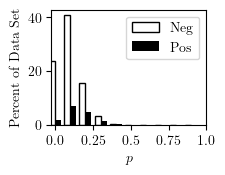


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Pred_Wide.png


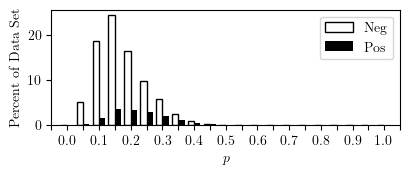


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_ROC.png


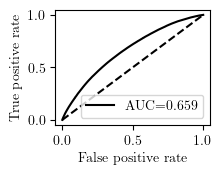


Linear_Transform_y_proba()

a = 0.013, b = 0.625

Analyze_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 144071
108393
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_100_Pred.png


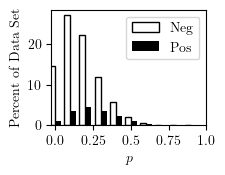


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_100_Pred_Wide.png


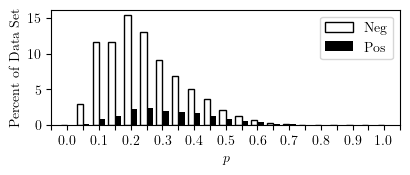


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_100
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_100_ROC.png


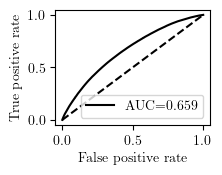


Linear_Transform_y_proba()

a = 0.035, b = 0.425

Analyze_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 141977
106299
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_98_Pred.png


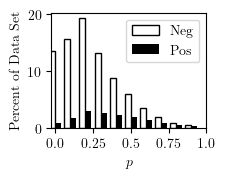


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_98_Pred_Wide.png


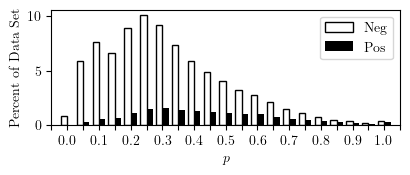


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_98
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_98_ROC.png


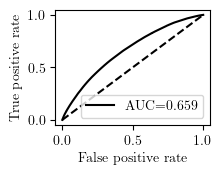


Linear_Transform_y_proba()

a = 0.041, b = 0.384

Analyze_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 139253
103575
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_95_Pred.png


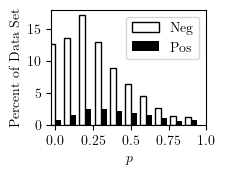


Plot_Prediction()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_95_Pred_Wide.png


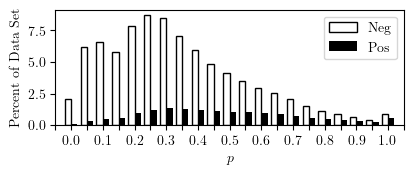


ROC()
KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_95
p_values =  []
./Images/KBFC_5_Fold_alpha_0_5_gamma_0_0_Easy_Test_Transformed_95_ROC.png


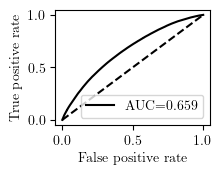





------------------------

KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy

K-fold iteration =  0
data.shape =  (713566, 42) 42
y_proba_fold
[0.27840582, 0.31181833, 0.56546074, 0.49225572, 0.536642, 0.5213875, 0.44684044, 0.59375554, 0.23124635, 0.2846693]
K-fold iteration =  1
data.shape =  (713566, 42) 42
y_proba_fold
[0.44270802, 0.4290127, 0.6055565, 0.4310909, 0.49129426, 0.24904884, 0.50074995, 0.47513554, 0.615785, 0.3845171]
K-fold iteration =  2
data.shape =  (713566, 42) 42
y_proba_fold
[0.6164959, 0.43046957, 0.5910972, 0.32547563, 0.52709544, 0.47462904, 0.5375968, 0.57673615, 0.48265797, 0.44751626]
K-fold iteration =  3
data.shape =  (713566, 42) 42
y_proba_fold
[0.6310873, 0.5571481, 0.6057574, 0.5385821, 0.5129396, 0.44139126, 0.3419243, 0.27415046, 0.3419243, 0.33333382]
K-fold iteration =  4
data.shape =  (713566, 42) 42
y_proba_fold
[0.58107644, 0.4666969, 0.5547853, 0.6805653, 0.56340784, 0.46976408, 0.5645936, 0.34712973, 0.34712973, 0.46459147]
Analyze_Prediction()


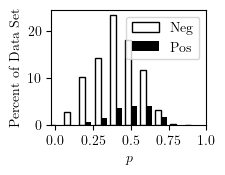


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Pred_Wide.png


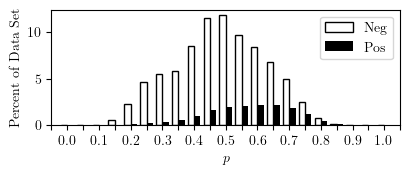


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_ROC.png


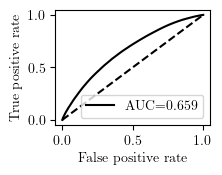


Linear_Transform_y_proba()

a = 0.047, b = 0.911

Analyze_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_100
Value_Counts_y_proba
713566 143878
108200
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_100_Pred.png


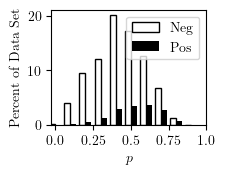


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_100
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_100_Pred_Wide.png


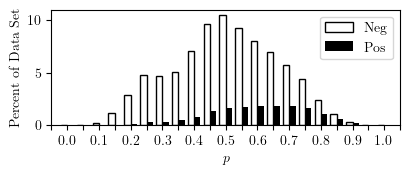


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_100
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_100_ROC.png


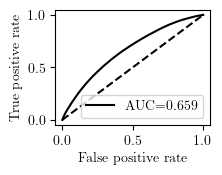


Linear_Transform_y_proba()

a = 0.163, b = 0.789

Analyze_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_98
Value_Counts_y_proba
713566 141692
106014
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_98_Pred.png


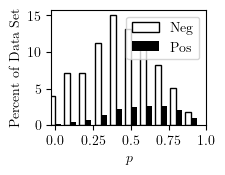


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_98
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_98_Pred_Wide.png


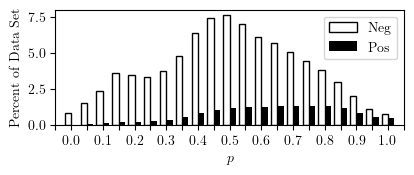


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_98
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_98_ROC.png


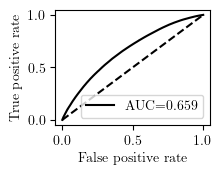


Linear_Transform_y_proba()

a = 0.189, b = 0.763

Analyze_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_95
Value_Counts_y_proba
713566 138987
103309
Finished
Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_95_Pred.png


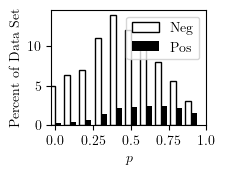


Plot_Prediction()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_95
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_95_Pred_Wide.png


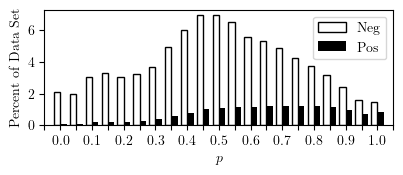


ROC()
KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_95
p_values =  []
./Images/KBFC_5_Fold_alpha_balanced_gamma_0_0_Easy_Test_Transformed_95_ROC.png


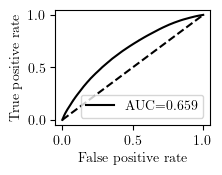




CPU times: user 2h 1min 49s, sys: 1min 35s, total: 2h 3min 24s
Wall time: 2h 2min 27s


In [54]:
%%time
#Run_with_Easy_Features()